In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. calendar

In [2]:
calendar = pd.read_csv('calendar.csv')

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,645048906856594097,2022-06-20,t,$890.00,$890.00,1.0,365.0
1,645048906856594097,2022-06-21,t,$890.00,$890.00,1.0,365.0
2,645048906856594097,2022-06-22,t,$890.00,$890.00,1.0,365.0
3,645048906856594097,2022-06-23,t,$890.00,$890.00,1.0,365.0
4,645048906856594097,2022-06-24,t,$890.00,$890.00,1.0,365.0


### 1.1 Data Size

The calendar csv has 6231645 rows and 7 attributes.

In [4]:
calendar.shape

(6231645, 7)

### 1.2 Attribute Meaning

* **listing_id**: listing id of the aibnb housing
* **date**: the date in the listing's calendar
* **available**: whether the listing is available for booking at that date
* **price**: the price listed of the housing at that date
* **adjusted_price**: adjusted price of the housing at that date, dynamic pricing
* **minimum_nights**: the minimum nights for a booking made on this day
* **maximum_nights**: the maximum nights for a booking made on this day

### 1.3 Attribute Data Type

In [6]:
calendar.dtypes

Unnamed: 0          int64
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

* **listing_id**: integer  
might convert to varchar(18) in SQL
* **date**: string  
might convert to date type in SQL
* **available**: string  
char(1) in SQL
* **price**: string  
might convert to float(1) in SQL
* **adjusted_price**: string  
might convert to float(1) in SQL
* **minimum_nights**: float  
float(1) in SQL
* **maximum_nights**: float   
float(1) in SQL

### 1.4 Attribute Domain and Volume

## **listing_id**: 17073 unique listing ids. Max 18 digits in total.

In [7]:
calendar['listing_id'].nunique()

17073

In [8]:
len(str(max(calendar['listing_id'])))

18

**date**: the listings starts from 2022/06/20 to 2023/06/20. Examining the selection of one listing_id shows that some listings are associated with 365 days, but not all. <span style="color:blue">**The PK Combo?**</span>

In [9]:
# convert date to datetime object
date = pd.to_datetime(calendar['date'])

In [10]:
date.head()

0   2022-06-20
1   2022-06-21
2   2022-06-22
3   2022-06-23
4   2022-06-24
Name: date, dtype: datetime64[ns]

In [11]:
max(date)

Timestamp('2023-06-20 00:00:00')

In [12]:
min(date)

Timestamp('2022-06-20 00:00:00')

In [13]:
# listing with full year prices
x = calendar.loc[calendar['listing_id'] == 645048906856594097]
x.shape

(365, 8)

In [14]:
# listing with partial prices
x = calendar.loc[calendar['price'] == '$1,500,000.00']
x.shape

(345, 8)

**available**: two levels: t and f, corresponding to true and false for availability. 4329257 rows with t and 1902388 rows with f.

In [15]:
calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [16]:
calendar['available'].value_counts()

t    4329257
f    1902388
Name: available, dtype: int64

**price**: ranges from \\$252.0 to \\$1500000.0, with a median of \\$1215.0. This indicates that most of the prices are low, with a few very high prices that makes the distribution of price highly skewed to the right.

In [17]:
price = calendar["price"].str.replace('[\$\,\.]', '').astype(float)
price = price/100
price.head()

/var/folders/x7/bkzyc74x221_9zcr_p3637s40000gn/T/ipykernel_82601/3807403196.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  price = calendar["price"].str.replace('[\$\,\.]', '').astype(float)


0    890.0
1    890.0
2    890.0
3    890.0
4    890.0
Name: price, dtype: float64

In [18]:
max(price)

1500000.0

In [19]:
min(price)

252.0

In [20]:
price.quantile([0.25,0.5,0.75])

0.25     800.0
0.50    1215.0
0.75    2000.0
Name: price, dtype: float64

In [21]:
price.describe()

count    6.231645e+06
mean     2.380776e+03
std      1.382413e+04
min      2.520000e+02
25%      8.000000e+02
50%      1.215000e+03
75%      2.000000e+03
max      1.500000e+06
Name: price, dtype: float64

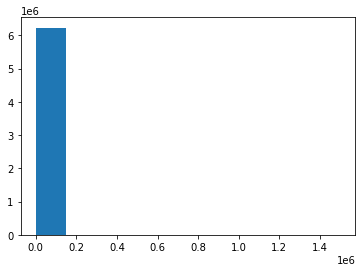

In [22]:
plt.hist(price)
plt.show() 

**adjusted_price**: ranges from \\$165.0 to \\$1500000.0, with a median of \\$1200.0. There are 333341 rows with adjusted price different from the listed price. 329672 rows have higher price than adjusted price, which is 98.9% of the time the host will set a lower adjusted price; 3669 rows have lower price than adjusted price, which is 1.1% of the time the host will set a higher adjusted price. The distribution of the adjusted_price is very similar to that of the price.

In [23]:
adjusted_price = calendar["adjusted_price"].str.replace('[\$\,\.]', '').astype(float)
adjusted_price = adjusted_price/100
adjusted_price.head()

/var/folders/x7/bkzyc74x221_9zcr_p3637s40000gn/T/ipykernel_82601/3762613851.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  adjusted_price = calendar["adjusted_price"].str.replace('[\$\,\.]', '').astype(float)


0    890.0
1    890.0
2    890.0
3    890.0
4    890.0
Name: adjusted_price, dtype: float64

In [24]:
max(adjusted_price)

1500000.0

In [25]:
min(adjusted_price)

165.0

In [26]:
adjusted_price.quantile([0.25,0.5,0.75])

0.25     800.0
0.50    1200.0
0.75    2000.0
Name: adjusted_price, dtype: float64

In [27]:
adjusted_price.describe()

count    6.231645e+06
mean     2.363647e+03
std      1.381745e+04
min      1.650000e+02
25%      8.000000e+02
50%      1.200000e+03
75%      2.000000e+03
max      1.500000e+06
Name: adjusted_price, dtype: float64

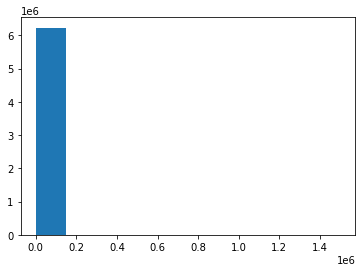

In [28]:
plt.hist(adjusted_price)
plt.show() 

In [29]:
price_diff = price - adjusted_price

In [30]:
price_diff.unique()

array([   0.,  169.,   84., ..., 3176.,  870.,   61.])

In [31]:
# price != adjusted_price
len([i for i in range(len(price_diff)) if price_diff[i] != 0.0])

333341

In [32]:
# price < adjusted_price
len([i for i in range(len(price_diff)) if price_diff[i] < 0.0])

3669

In [33]:
# price > adjusted_price
len([i for i in range(len(price_diff)) if price_diff[i] > 0.0])

329672

In [34]:
# a peak at one listing on 2022/07/21 with lower adjusted_price
calendar.iloc[[31420]]

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
31420,31420,852063,2022-07-21,t,"$1,693.00","$1,524.00",14.0,1125.0


In [35]:
3669/333341

0.011006746844822569

In [36]:
max(price_diff)

20000.0

In [37]:
min(price_diff)

-2370.0

**minimum_nights**: ranges from 1 day to 1125 days, with a median of 1 day. Out of the 6231465 rows, there are 3468431 rows with minimum nights of 1 day, which is 55.7% of the rows. Most of the listings have small minimum nights requirement, but with some around 200 days and 400 days and few even higher, which leads to a highly skewed to the right distribution.

In [38]:
max(calendar['minimum_nights'])

1125.0

In [39]:
min(calendar['minimum_nights'])

1.0

In [40]:
calendar['minimum_nights'].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    1.0
0.75    7.0
Name: minimum_nights, dtype: float64

In [41]:
calendar['minimum_nights'].describe()

count    6.231645e+06
mean     1.412625e+01
std      4.561987e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      7.000000e+00
max      1.125000e+03
Name: minimum_nights, dtype: float64

In [42]:
len(calendar[calendar['minimum_nights'] == 1.0])

3468433

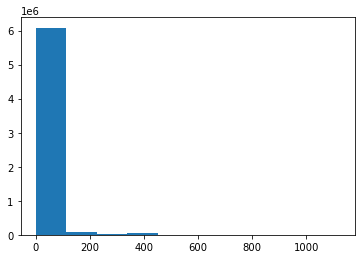

In [116]:
plt.hist(calendar['minimum_nights'])
plt.show() 

**maximum_nights**: ranges from 1 day to 2147483647 days. Examining the quantiles reveals a highly skewed to the right distribution.

In [118]:
max(calendar['maximum_nights'])

2147483647.0

In [119]:
min(calendar['maximum_nights'])

1.0

In [120]:
calendar['maximum_nights'].quantile([0.25,0.5,0.75])

0.25     365.0
0.50    1125.0
0.75    1125.0
Name: maximum_nights, dtype: float64

In [121]:
calendar['maximum_nights'].describe()

count    6.231643e+06
mean     1.706353e+06
std      6.049433e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

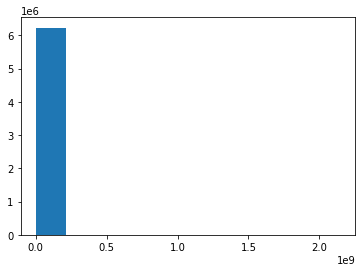

In [122]:
plt.hist(calendar['maximum_nights'])
plt.show() 

### 1.5 Attribute Constraint, PK and FK

* primary key(listing_id, date)
* check (available in ('t', 'f'))
* check (price > 0)
* check (adjusted_price > 0)
* check (minimum_nights >= 1)
* check (maximum_nights >= 1)
* foreign key(id) references listings

any other?

## 2. reviews

In [11]:
reviews = pd.read_csv('reviews.csv')

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,39544047,564106023,2019-11-15,273940743,Kim,"Good communication, basic and clean accommodation"
1,39544047,566622127,2019-11-20,143251478,Oliver,"Good, clean, cheap accomodation in proximity t..."
2,39544047,568138380,2019-11-24,288635322,Doris,"A nice room, very close to impact arena, also ..."
3,39544047,568816394,2019-11-24,163790201,Yang,The landlord sister is really kind and lovely....
4,39544047,597651173,2020-01-26,317920443,Kunat,"The room was very new, cleand and well funishe..."


In [125]:
calendar[calendar['listing_id'] == 39544047]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
6230185,39544047,2022-06-20,t,$600.00,$600.00,15.0,1125.0
6230186,39544047,2022-06-21,f,$600.00,$600.00,15.0,1125.0
6230187,39544047,2022-06-22,f,$600.00,$600.00,15.0,1125.0
6230188,39544047,2022-06-23,t,$600.00,$600.00,15.0,1125.0
6230189,39544047,2022-06-24,t,$600.00,$600.00,15.0,1125.0
...,...,...,...,...,...,...,...
6230545,39544047,2023-06-15,f,$600.00,$600.00,15.0,1125.0
6230546,39544047,2023-06-16,f,$600.00,$600.00,15.0,1125.0
6230547,39544047,2023-06-17,f,$600.00,$600.00,15.0,1125.0
6230548,39544047,2023-06-18,f,$600.00,$600.00,15.0,1125.0


In [126]:
reviews[reviews['listing_id'] == 39544047]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,39544047,564106023,2019-11-15,273940743,Kim,"Good communication, basic and clean accommodation"
1,39544047,566622127,2019-11-20,143251478,Oliver,"Good, clean, cheap accomodation in proximity t..."
2,39544047,568138380,2019-11-24,288635322,Doris,"A nice room, very close to impact arena, also ..."
3,39544047,568816394,2019-11-24,163790201,Yang,The landlord sister is really kind and lovely....
4,39544047,597651173,2020-01-26,317920443,Kunat,"The room was very new, cleand and well funishe..."
5,39544047,614381661,2020-03-05,19143977,Ploi,ห้องดี ใหม่ สะอาด เจ้าของอัธยาศัยดีมาก แนะนำดี...


### 2.1 Data Size

The reviews csv has 246644 rows and 6 attributes.

In [7]:
reviews.shape

(246644, 6)

### 2.2 Attribute Meaning

* **listing_id**: listing id of the aibnb housing, <span style="color:blue">*same as listing_id in calendar*</span>
* **id**: the review's id
* **date**: the date of the review
* **reviewer_id**: the reviewer's id
* **reviewer_name**: the reviewer's name
* **comments**: the review's comment

### 2.3 Attribute Data Type

In [166]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

* **listing_id**: integer  
might convert to varchar(18) in SQL
* **id**: integer  
might convert to varchar(18) in SQL
* **date**: string  
might convert to date type in SQL
* **reviewer_id**: integer
might convert to varchar(9) in SQL
* **review_name**: string  
might convert to varchar(42) in SQL, length may need to increase
* **comments**: string  
might convert to varchar(6577) in SQL, length may need to increase

### 2.4 Attribute Domain and Volume

**listing_id**: 10012 unique listing ids. Max 18 digits in total. <span style="color:blue">*All listing_ids in reviews are in calendar.*</span>

In [178]:
reviews['listing_id'].nunique()

10012

In [186]:
len(str(max(reviews['listing_id'])))

18

In [180]:
contains = reviews.listing_id.isin(calendar.listing_id)
sum(contains)

246644

**id**: all reviews' ids are unique. Max 18 digits in total.

In [188]:
reviews['id'].nunique()

246644

In [189]:
len(str(max(reviews['id'])))

18

**date**: the reviews starts from 2011/02/09 to 2022/06/21. <span style="color:blue">Comparing with the date of calendar, not much overlapping.</span> In addition, the review date does not need to be a leave date or occupying date of the reviewer.

In [191]:
# convert date to datetime object
date = pd.to_datetime(reviews['date'])

In [192]:
date.head()

0   2019-11-15
1   2019-11-20
2   2019-11-24
3   2019-11-24
4   2020-01-26
Name: date, dtype: datetime64[ns]

In [193]:
max(date)

Timestamp('2022-06-21 00:00:00')

In [194]:
min(date)

Timestamp('2011-02-09 00:00:00')

In [199]:
# reviews with review date on and after 2022/06/20, does not guarantee review date is leave/occupying date.
reviews[pd.to_datetime(reviews['date']) >= '2022-06-20']

,listing_id,id,date,reviewer_id,reviewer_name,comments
14645,858311,653221150236329866,2022-06-20,333271858,Darnell,Amazing place great communication. Very respon...
14842,3480807,653302870648996654,2022-06-20,48214584,Rajat,Great place. Clean and amazing location.
19037,3794264,653210888142648490,2022-06-20,187999745,媛宝宝,位置微偏，但是房间不错，房间很大，比一室一厅的面积都大。性价比高
106956,16244017,653269184130258586,2022-06-20,321228181,Maksim,"Yumi was a good host, we enjoyed staying at Ha..."
116089,17933003,653283981037470647,2022-06-20,462297420,Martin,Very friendly host
129559,19126623,653211565757063571,2022-06-20,250649854,Kotoko,It was super nice staying! I will come back ag...
141279,21132272,653233196299440744,2022-06-20,375821837,Donald,Good short stay
152431,22996193,653320871220926467,2022-06-20,62711599,Chuck Sin,"Great location, very near to BTS station, conv..."
161386,23470809,653992104424290922,2022-06-21,314828448,Joey,nice place!
168078,26304795,653248413762835158,2022-06-20,234327762,Eunice,"spacious and cozy room, very attentive and hel..."


In [202]:
calendar[calendar['listing_id'] == 42822570]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4386205,42822570,2022-06-21,f,"$2,684.00","$2,684.00",1.0,1125.0
4386206,42822570,2022-06-22,f,"$2,684.00","$2,684.00",1.0,1125.0
4386207,42822570,2022-06-23,f,"$2,684.00","$2,684.00",1.0,1125.0
4386208,42822570,2022-06-24,f,"$2,684.00","$2,684.00",1.0,1125.0
4386209,42822570,2022-06-25,f,"$2,684.00","$2,684.00",1.0,1125.0
...,...,...,...,...,...,...,...
4386565,42822570,2023-06-16,f,"$2,684.00","$2,684.00",1.0,1125.0
4386566,42822570,2023-06-17,f,"$2,684.00","$2,684.00",1.0,1125.0
4386567,42822570,2023-06-18,f,"$2,684.00","$2,684.00",1.0,1125.0
4386568,42822570,2023-06-19,f,"$2,684.00","$2,684.00",1.0,1125.0


<AxesSubplot:xlabel='date'>

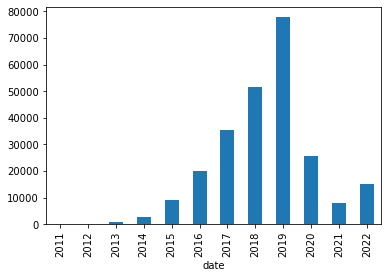

In [219]:
# showing #reviews by year
date.groupby(date.dt.year).count().plot(kind="bar")

**reviewer_id**: 210367 unique reviewer ids, meaning there are reviews left by the same reviewer, either for the same listing or different listing, on the same date or not.

In [203]:
reviews['reviewer_id'].nunique()

210367

In [212]:
len(((reviews['listing_id']).astype(str)+(reviews['reviewer_id']).astype(str)).unique())

240229

In [213]:
len(((reviews['listing_id']).astype(str)+
     (reviews['reviewer_id']).astype(str)+
     (reviews['date']).astype(str)).unique())

246613

**reviewer_name**: max 42 characters. <span style="color:blue">Figuring out how to detect language. Tried language detect and textblob so far, might try deep_translator (need to get an API key). Used langdetect at the end.</span>

In [12]:
# seems not be able to detect some chinese characters
from langdetect import detect

reviewer_name = reviews['reviewer_name']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(reviewer_name[i])                                      
    except:                                                       
       lang = 'no'                                                  
       #print(reviwer_name.index, "This row throws error:", reviewer_name[i])                 
    langdet.append(lang)       

In [14]:
set(langdet)

{'af',
 'ar',
 'bg',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'el',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'he',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'mk',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'uk',
 'vi',
 'zh-cn',
 'zh-tw'}

In [18]:
len(set(langdet))

43

In [8]:
# # gives http error
# from textblob import TextBlob

# reviewer_name = TextBlob(reviews['reviewer_name'][0])
# reviewer_name.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [174]:
max(reviews['reviewer_name'].map(str).apply(len))

42

**comment**: max 6577 characters. <span style="color:blue">Same language detection needed as above.</span>

In [177]:
max(reviews['comments'].str.len())

6577.0

In [19]:
# language detection
comments = reviews['comments']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(comments[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [20]:
set(langdet)

{'af',
 'ar',
 'bg',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'el',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'he',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'mk',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'uk',
 'ur',
 'vi',
 'zh-cn',
 'zh-tw'}

### 2.5 Attribute Constraint, PK and FK

* primary key(id)
* foreign key(listing_id) references listings
* foreign key(reviewer_id) references reviewers (a new relation reviewers containing two attributes: reviewer_id as primary key, and reviewer_name)

any other?

## 3. Listing

In [21]:
listings = pd.read_csv('listings.csv')

In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,645048906856594097,https://www.airbnb.com/rooms/645048906856594097,20220620202126,2022-06-20,Furnished 1 bedroom condo with beautiful view,🏢Condo For rent: Lumpini Ville Nakhon In-River...,Its in Lumpini building,https://a0.muscache.com/pictures/miso/Hosting-...,4663219,https://www.airbnb.com/users/show/4663219,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,15636062,https://www.airbnb.com/rooms/15636062,20220620202126,2022-06-20,Akesin place ngamwongwan,ที่ของฉันใกล้กับร้านอาหารและของกิน และ ขนส่งสา...,NaN,https://a0.muscache.com/pictures/f68098b9-3ff2...,100840975,https://www.airbnb.com/users/show/100840975,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,39544047,https://www.airbnb.com/rooms/39544047,20220620202126,2022-06-20,IMPACT Thunder Dome Muangthong ND condo ( C1 ),NaN,IMPACT ศูนย์แสดงสินค้า 550 m<br />IMPACT Chal...,https://a0.muscache.com/pictures/cc410e7d-922f...,303573998,https://www.airbnb.com/users/show/303573998,...,5.0,4.67,4.67,NaN,t,2,0,2,0,0.19
3,34002624,https://www.airbnb.com/rooms/34002624,20220620202126,2022-06-20,Popular Condo Near IMPACT,คอนโดเมืองทองอยู่ในบริเวณเดียวกับศูนย์แสดงสินค...,คอนโดเมืองทองอยู่ในบริเวณเดียวกับศูนย์แสดงสินค...,https://a0.muscache.com/pictures/e4811699-0153...,256747704,https://www.airbnb.com/users/show/256747704,...,4.0,4.50,4.00,NaN,t,1,0,1,0,0.08
4,22678899,https://www.airbnb.com/rooms/22678899,20220620202126,2022-06-20,บ้านเบนซ์,เป็นหมู่บ้านขนาดใหญ่มีหลายเฟส บ้านเป็นทาวน์โฮม...,NaN,https://a0.muscache.com/pictures/02e4ae53-dbe6...,167136634,https://www.airbnb.com/users/show/167136634,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


### 3.1 Date Size

The listings csv has 17074 rows and 74 attributes.

In [10]:
listings.shape

(17074, 74)

### 3.2 Attribute Meaning

referring to https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896, <span style="color:blue">also shows which attributes are calculated</span>
* **id**: listing id of the airbnb housing, <span style="color:blue">*same as listing_id in calendar and reviews*</span>
* **listing_url**: the url of the airbnb housing
* **scrape_id**: web scraping id
* **last_scraped**: UTC, the date and time this listing was scraped
* **name**: name of the listing
* **description**: detailed description of the listing
* **neighborhood_overview**: host's description of the neighborhood
* **picture_url**: URL to the airbnb hosted regular sized image for the listing, i.e. the first image of the listing
<br/><br/>
* **host_id**: airbnb's unique identifier for the host/user
* **host_url**: the host's airbnb page
* **host_name**: the name of the host, usually just the first name
* **host_since**: the date the host/user was created. For hosts that are airbnb guests this could be the date they registered as a guest. i.e. the date the host joined airbnb as a host or a guest
* **host_location**: the host's self-reported location
* **host_about**: the host's self description
* **host_response_time**: the average amount of time that the host took to respond to all new messages in the past 30 days (past 30 days with respect to the listing's scarped date)
* **host_response_rate**: the percentage of new enquiries and reservation requests the host responded to (by either accepting/pre-approving or declining) within 24 hours in the past 30 days, referring to https://www.airbnb.com.sg/help/article/430/what-are-response-rate-and-response-time-and-how-are-they-calculated?_set_bev_on_new_domain=1665470652_YWVkYjQ5ZjcyOTM2
* **host_acceptance_rate**: the rate at which the host accepts booking requests
* **host_is_superhost**: whether the host is a superhost 
* **host_thumbnail_url**: the host's profile picture on the listing page, displayed small
* **host_picture_url**: the host's profile picture on the airbnb page, displayed medium
* **host_neighbourhood**: the neighbourhood the host lives in. <span style="color:blue">*Unable to locate on host's page and listing page, not sure whether airbnb provides this info anymore*</span>
* **host_listings_count**: the number of listings the host has (per Airbnb calculations)
* **host_total_listings_count**: the number of listings the host has (per Airbnb calculations). <span style="color:blue">*Same as host_listings_count?*</span>
* **host_verifications**: in what ways the host has confirmed identity
* **host_has_profile_pic**: whether the host has a profile picture
* **host_identity_verified**: whether the host's identity has been verified by airbnb, referring to https://www.airbnb.com.sg/help/article/1237/verifying-your-identity
<br/><br/>
* **neighbourhood**: the neighbourhood of the listing
* **neighbourhood_cleansed**: the neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles
* **neighbourhood_group_cleansed**: the neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles
* **latitude**: the latitude of the listing, uses the World Geodetic System (WGS84) projection for latitude and longitude
* **longitude**: the longitude of the listing, uses the World Geodetic System (WGS84) projection for latitude and longitude
* **property_type**: self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
* **room_type**: room type of the listing, referring to https://www.airbnb.com.sg/help/article/5/types-of-places-to-stay?_set_bev_on_new_domain=1665470652_YWVkYjQ5ZjcyOTM2
<br/><br/>
* **accommodates**: the maximum capacity of the listing
* **bathrooms**: the number of bathrooms in the listing
* **bathrooms_text**: textual description of the number of bathrooms in the listing
* **bedrooms**: the number of bedrooms
* **beds**: the number of bed(s)
* **amenities**: the list of amenities the place offers
* **price**: daily price in local currency
<br/><br/>
* **minimum_nights**: minimum number of night stay for the listing
* **maximum_nights**: maximum number of night stay for the listing
* **minimum_minimum_nights**: the smallest minimum_nights value from the calender (looking 365 nights in the future)
* **maximum_minimum_nights**: the largest minimum_nights value from the calender (looking 365 nights in the future)
* **minimum_maximum_nights**: the smallest maximum_nights value from the calender (looking 365 nights in the future)
* **maximum_maximum_nights**: the largest maximum_nights value from the calender (looking 365 nights in the future)
* **minimum_nights_avg_ntm**: the average minimum_nights value from the calender (looking 365 nights in the future)
* **maximum_nights_avg_ntm**: the average maximum_nights value from the calender (looking 365 nights in the future)
<br/><br/>
* **calendar_updated**: <span style="color:blue">not sure what this attribute is, empty column, no description in the above link</span>
* **has_availability**: whether the listing is available based on the following four columns, i.e. in the next 365 days
* **availability_30**: the availability of the listing 30 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host
* **availability_60**: the availability of the listing 60 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host
* **availability_90**: the availability of the listing 90 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host
* **availability_365**: the availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host
* **calendar_last_scraped**: the date the listing's calendar was last scraped
<br/><br/>
* **number_of_reviews**: the number of reviews the listing has
* **number_of_reviews_ltm**: the number of reviews the listing has (in the last 12 months)
* **number_of_reviews_l30d**: the number of reviews the listing has (in the last 30 days)
* **first_review**: the date of the first/oldest review
* **last_review**: the date of the last/newest review
* **review_scores_rating**: the overall score rating of the listing by all reviews, out of 5
* **review_scores_accuracy**: the accuracy score for the listing by all reviews, out of 5
* **review_scores_cleanliness**: the cleanliness score for the listing by all reviews, out of 5
* **review_scores_checkin**: the checkin score for the listing by all reviews, out of 5
* **review_scores_communication**: the communication score for the listing by all reviews, out of 5
* **review_scores_location**: the location score for the listing by all reviews, out of 5
* **review_scores_value**: the value score for the listing by all reviews, out of 5
<br/><br/>
* **license**: the licence/permit/registration number
* **instant_bookable**: whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing
* **calculated_host_listings_count**: the number of listings the host has in the current scrape, in the city/region geography.
* **calculated_host_listings_count_entire_homes**: the number of Entire home/apt listings the host has in the current scrape, in the city/region geography
* **calculated_host_listings_count_private_rooms**: the number of Private room listings the host has in the current scrape, in the city/region geography
* **calculated_host_listings_count_shared_rooms**: the number of Shared room listings the host has in the current scrape, in the city/region geography
* **reviews_per_month**: the number of reviews the listing has over the lifetime of the listing (in months)

### 3.3 Attribute Data Type

* **id**: integer  
might convert to varchar(18) in SQL
* **listing_url**: string  
might convert to varchar(2048) in SQL. *2048 by the conventional max length for URL*
* **scrape_id**: integer  
<span style="color:blue">might delete this row in SQL</span>
* **last_scraped**: string  
might convert to date type in SQL
* **name**: string  
might convert to varchar(255) in SQL, length may need to increase
* **description**: string  
might convert to varchar(1000) in SQL, length may need to increase
* **neighborhood_overview**: string  
might convert to varchar(1000) in SQL, length may need to increase
* **picture_url**: string  
might convert to varchar(2048) in SQL. *2048 by the conventional max length for URL*
<br></br>
* **host_id**: integer  
might convert to varchar(9) in SQL
* **host_url**: string  
might convert to varchar(2048) in SQL. *2048 by the conventional max length for URL*
* **host_name**: string  
might convert to varchar(35) in SQL, length may need to increase
* **host_since**: string  
might convert to date type in SQL
* **host_location**: string  
might convert to varchar(125) in SQL, length may need to increase
* **host_about**: string  
might convert to varchar(5893) in SQL, length may need to increase
* **host_response_time**: string  
might convert to varchar(18) or int in SQL. *int based on James' note to handle missing values*
* **host_response_rate**: string  
might convert to int in SQL. *% to whitespace according to James' note*
* **host_acceptance_rate**: string  
might convert to int in SQL. *% to whitespace according to James' note*
* **host_is_superhost**: string  
might convert to char(1) in SQL
* **host_thumbnail_url**: string  
might convert to varchar(2048) in SQL. *2048 by the conventional max length for URL*
* **host_picture_url**: string  
might convert to varchar(2048) in SQL. *2048 by the conventional max length for URL*
* **host_neighbourhood**: string  
might convert to varchar(28) in SQL, length may need to increase
* **host_listings_count**: float  
float(1) in SQL
* **host_total_listings_count**: float  
<span style="color:blue">might delete this row in SQL</span>
* **host_verifications**: string  
might convert to varchar(32) in SQL
* **host_has_profile_pic**: string  
after imputing the missing values, might convert to char(1) in SQL
* **host_identity_verified**: string  
after imputing the missing values, might convert to char(1) in SQL
<br></br>
* **neighbourhood**: string  
might convert to varchar(80) in SQL, length may need to increase
* **neighbourhood_cleansed**: string  
might convert to char(20) in SQL
* **neighbourhood_group_cleansed**: float  
<span style="color:blue">all empty values, might delete this row in SQL</span>
* **latitude**: float  
might convert to float(5) in SQL
* **longitude**: float  
might convert to float(5) in SQL
* **property_type**: string  
might convert to varchar(34) in SQL
* **room_type**: string
might convert to varchar(15) in SQL
<br></br>
* **accommodates**: integer  
int
* **bathrooms**: float  
<span style="color:blue">all empty values, might delete this row in SQL</span>
* **bathrooms_text**: string  
might convert to varchar(17) in SQL
* **bedrooms**: float  
might convert to float(1) in SQL
* **beds**: float  
might convert to float(1) in SQL
* **amenities**: string  
might convert to varchar(1606) in SQL
* **price**: string  
might convert to float(1) in SQL
<br></br>
* **minimum_nights**: integer  
int
* **maximum_nights**: integer  
int
* **minimum_minimum_nights**: float  
might convert to float(1) in SQL
* **maximum_minimum_nights**: float  
might convert to float(1) in SQL
* **minimum_maximum_nights**: float  
might convert to float(1) in SQL
* **maximum_maximum_nights**: float  
might convert to float(1) in SQL
* **minimum_nights_avg_ntm**: float  
might convert to float(1) in SQL
* **maximum_nights_avg_ntm**: float  
might convert to float(1) in SQL
<br></br>
* **calendar_updated**: float  
<span style="color:blue">all empty values, might delete this row in SQL</span>
* **has_availability**: string  
might convert to char(1) in SQL
* **availability_30**: integer  
int
* **availability_60**: integer  
int
* **availability_90**: integer  
int
* **availability_365**: integer  
int
* **calendar_last_scraped**: string  
might convert to date type in SQL
<br></br>
* **number_of_reviews**: integer  
int
* **number_of_reviews_ltm**: integer  
int
* **number_of_reviews_l30d**: integer  
int
* **first_review**: float  
might convert to date type in SQL
* **last_review**: float  
might convert to date type in SQL
* **review_scores_rating**: float  
float(1)
* **review_scores_accuracy**: float  
float(1)
* **review_scores_cleanliness**: float  
float(1)
* **review_scores_checkin**: float  
float(1)
* **review_scores_communication**: float  
float(1)
* **review_scores_location**: float  
float(1)
* **review_scores_value**: float  
float(1)
<br></br>
* **license**: float  
<span style="color:blue">all empty values, might delete this row in SQL</span>
* **instant_bookable**: string  
char(1)
* **calculated_host_listings_count**: integer  
int
* **calculated_host_listings_count_entire_homes**: integer  
int
* **calculated_host_listings_count_private_rooms**: integer  
int
* **calculated_host_listings_count_shared_rooms**: integer  
int
* **reviews_per_month**: float  
float(2)

In [17]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

### 3.4 Attribute Domain and Volume¶

**id**: 17074 unique listing ids. Max 18 digits in total. <span style="color:blue">One listing id not in calendar.</span>

In [18]:
listings['id'].nunique()

17074

In [19]:
len(str(max(listings['id'])))

18

In [22]:
# one listing id not in calendar
contains = listings.id.isin(calendar.listing_id)
sum(contains)

17073

In [30]:
# find the listing id not in calendar
contains = np.array(contains)
np.where(~contains)

(array([13729]),)

In [31]:
listings.iloc[[13729]]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13729,44563108,https://www.airbnb.com/rooms/44563108,20220620202126,2022-06-21,Somerset Maison Asoke Bangkok,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,360620448,https://www.airbnb.com/users/show/360620448,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


**listing_url**: 17074 unique listing URLs. Max length 36 characters.

In [33]:
listings['listing_url'].nunique()

17074

In [34]:
len(str(max(listings['listing_url'])))

36

**scrape_id**: all listings has the same scrape_id 20220620202126, <span style="color:blue">can ignore this attribute.</span>

In [35]:
listings['scrape_id'].nunique()

1

In [36]:
listings['scrape_id'].unique()

array([20220620202126])

**last_scraped**: there are two days that the airbnb data was scraped: 2022/06/20 and 2022/06/21.

In [38]:
listings['last_scraped'].nunique()

2

In [39]:
listings['last_scraped'].unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

**name**: <span style="color:blue">Need language detection.</span> Emojis are not transferred to text appropriately. There are duplicate names for the listings. Max length 255 characters.

In [40]:
listings['name'].nunique()

16089

In [46]:
max(listings['name'].str.len())

255.0

In [22]:
# language detection
name = listings['name']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(name[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [23]:
set(langdet)

{'af',
 'bg',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'uk',
 'vi',
 'zh-cn',
 'zh-tw'}

**description**: <span style="color:blue">Need language detection.</span> Emojis are not transferred to text appropriately. There are duplicate description for the listings. Max length 1000 characters.

In [47]:
listings['description'].nunique()

13298

In [48]:
max(listings['description'].str.len())

1000.0

In [24]:
# language detection
description = listings['description']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(description[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [25]:
set(langdet)

{'af',
 'ar',
 'ca',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'id',
 'it',
 'ja',
 'ko',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'so',
 'sv',
 'sw',
 'th',
 'tl',
 'vi',
 'zh-cn',
 'zh-tw'}

**neighborhood_overview**: <span style="color:blue">Need language detection.</span> Emojis are not transferred to text appropriately. There are duplicate neighborhood description for the listings. Max length 1000 characters.

In [51]:
listings['neighborhood_overview'].nunique()

6002

In [52]:
max(listings['neighborhood_overview'].str.len())

1000.0

In [26]:
# language detection
neighborhood_overview = listings['neighborhood_overview']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(neighborhood_overview[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [27]:
set(langdet)

{'af',
 'ca',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'nl',
 'no',
 'pt',
 'ro',
 'ru',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'th',
 'tl',
 'vi',
 'zh-cn',
 'zh-tw'}

**picture_url**: 15799 unique picture URLs. Max length 122 characters.

In [53]:
listings['picture_url'].nunique()

15799

In [54]:
len(str(max(listings['picture_url'])))

122

**host_id**: 7639 unique host ids. Max 9 digits in total.

In [55]:
listings['host_id'].nunique()

7639

In [56]:
len(str(max(listings['host_id'])))

9

**host_url**: 7639 unique host urls. Max length 42 characters.

In [57]:
listings['host_url'].nunique()

7639

In [59]:
len(str(max(listings['host_url'])))

42

**host_name**: 5991 unique host names. <span style="color:blue">Need language detection.</span> There are duplicate host name for the listings. Max length 35 characters.

In [60]:
listings['host_name'].nunique()

5991

In [61]:
max(listings['host_name'].str.len())

35.0

In [28]:
# language detection
host_name = listings['host_name']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(host_name[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [29]:
set(langdet)

{'af',
 'bg',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'sk',
 'sl',
 'so',
 'sq',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'vi',
 'zh-cn',
 'zh-tw'}

**host_since**: the host since date ranges from 2009/12/02 to 2022/06/17.

In [68]:
host_since_date = pd.to_datetime(listings['host_since'])
host_since_date.head()

0   2013-01-11
1   2016-10-23
2   2019-10-21
3   2019-04-19
4   2018-01-11
Name: host_since, dtype: datetime64[ns]

In [69]:
max(host_since_date)

Timestamp('2022-06-17 00:00:00')

In [70]:
min(host_since_date)

Timestamp('2009-12-01 00:00:00')

<AxesSubplot:xlabel='host_since'>

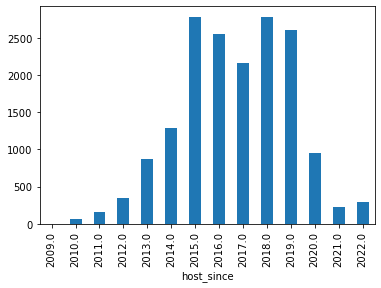

In [71]:
# showing #reviews by year
host_since_date.groupby(host_since_date.dt.year).count().plot(kind="bar")

**host_location**: <span style="color:blue">Need language detection.</span> Some are more detailed with district and city info, some just have country. 632 unique host locations. <span style="color:blue">(identify the unique locations directly, can separate into more details)</span>. Max length 125 characters.

In [72]:
listings['host_location'].head()

0    Siālkot, Punjab, Pakistan
1                           TH
2                           TH
3            Bangkok, Thailand
4    Lak Si, Bangkok, Thailand
Name: host_location, dtype: object

In [73]:
listings['host_location'].nunique()

632

In [77]:
max(listings['host_location'].str.len())

125.0

In [30]:
# language detection
host_location = listings['host_location']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(host_location[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [31]:
set(langdet)

{'af',
 'ca',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'id',
 'it',
 'ja',
 'ko',
 'lt',
 'lv',
 'nl',
 'no',
 'pt',
 'ro',
 'so',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'vi',
 'zh-cn'}

**host_about**: <span style="color:blue">Need language detection.</span> Max length 5893 characters.

In [80]:
listings['host_about'].nunique()

3305

In [82]:
max(listings['host_about'].str.len())

5893.0

In [32]:
# language detection
host_about = listings['host_about']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(host_about[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [33]:
set(langdet)

{'af',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'en',
 'es',
 'et',
 'fi',
 'fr',
 'hr',
 'id',
 'it',
 'ja',
 'ko',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'so',
 'sv',
 'sw',
 'th',
 'tl',
 'tr',
 'vi',
 'zh-cn',
 'zh-tw'}

**host_response_time**: five levels: within an hour, within a few hours, within a day, a few days or more, nan(missing values). 7033 listings within an hour, 1420 listings within a few hours, 1252 lisitings within a day, 1740 listing a few days or more, 5629 rows with missing value. Max length 18 characters.

In [83]:
listings['host_response_time'].unique()

array(['within an hour', nan, 'a few days or more', 'within a day',
       'within a few hours'], dtype=object)

In [84]:
listings['host_response_time'].value_counts()

within an hour        7033
a few days or more    1740
within a few hours    1420
within a day          1252
Name: host_response_time, dtype: int64

<AxesSubplot:>

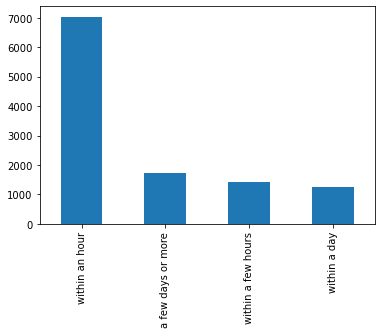

In [86]:
listings['host_response_time'].value_counts().plot.bar()

In [87]:
max(listings['host_response_time'].str.len())

18.0

**host_response_rate**: 54 levels with values counts as shown below.

In [88]:
listings['host_response_rate'].unique()

array(['100%', nan, '0%', '75%', '50%', '43%', '90%', '80%', '83%', '88%',
       '22%', '33%', '97%', '78%', '70%', '60%', '89%', '86%', '93%',
       '67%', '94%', '91%', '96%', '92%', '25%', '95%', '44%', '59%',
       '99%', '17%', '64%', '71%', '56%', '57%', '14%', '63%', '84%',
       '98%', '10%', '38%', '29%', '20%', '40%', '73%', '13%', '85%',
       '87%', '65%', '27%', '72%', '81%', '58%', '11%', '68%', '77%'],
      dtype=object)

In [89]:
listings['host_response_rate'].nunique()

54

In [90]:
listings['host_response_rate'].value_counts()

100%    7016
0%      1265
50%      385
90%      304
80%      218
97%      201
99%      167
75%      162
94%      161
33%      136
96%      124
67%      105
25%       93
78%       89
98%       83
95%       81
60%       76
83%       74
70%       64
91%       61
88%       59
40%       57
93%       56
89%       49
17%       46
86%       35
44%       34
64%       24
87%       23
14%       16
59%       14
56%       14
38%       13
11%       12
43%       12
22%       12
29%       12
13%       11
71%       11
20%       10
92%       10
73%        8
65%        8
57%        7
77%        7
58%        5
84%        4
10%        2
85%        2
72%        2
81%        2
63%        1
27%        1
68%        1
Name: host_response_rate, dtype: int64

<AxesSubplot:>

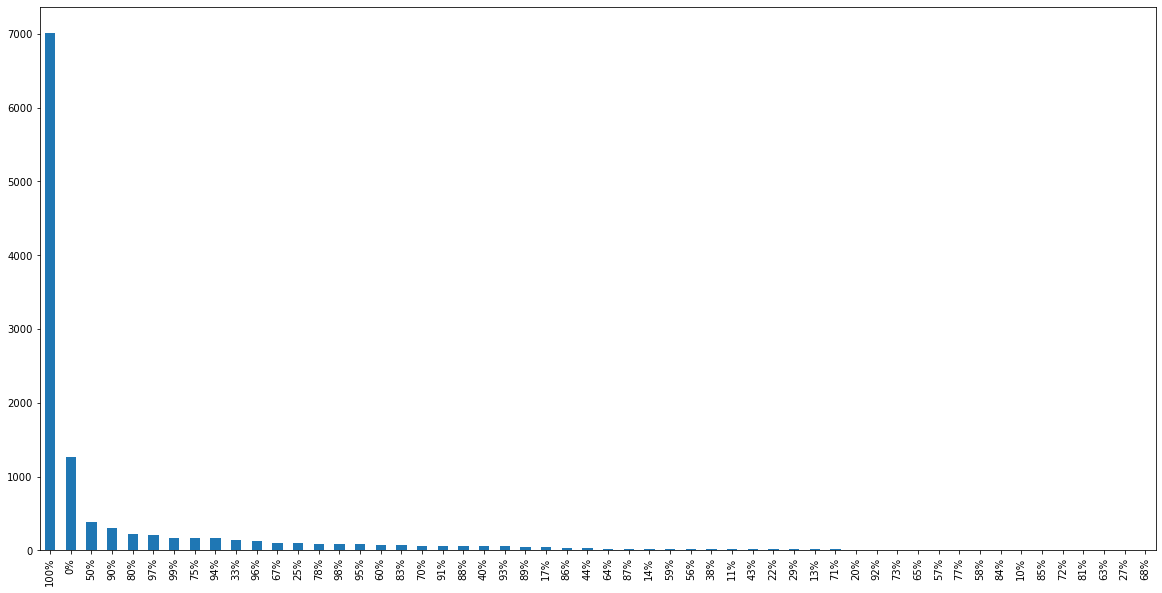

In [55]:
listings['host_response_rate'].value_counts().plot.bar(figsize=(20,10))

**host_acceptance_rate**: 70 levels with values counts as shown below.

In [92]:
listings['host_acceptance_rate'].unique()

array([nan, '100%', '40%', '50%', '92%', '94%', '86%', '60%', '99%', '0%',
       '71%', '88%', '33%', '83%', '75%', '27%', '80%', '95%', '81%',
       '52%', '89%', '96%', '53%', '84%', '67%', '25%', '47%', '78%',
       '98%', '73%', '66%', '61%', '93%', '85%', '82%', '91%', '63%',
       '90%', '97%', '79%', '30%', '69%', '57%', '54%', '38%', '42%',
       '87%', '77%', '7%', '10%', '8%', '70%', '74%', '58%', '20%', '21%',
       '55%', '29%', '6%', '76%', '17%', '72%', '22%', '13%', '43%',
       '39%', '68%', '56%', '14%', '46%', '64%'], dtype=object)

In [93]:
listings['host_acceptance_rate'].nunique()

70

In [94]:
listings['host_acceptance_rate'].value_counts()

100%    5675
99%      776
0%       649
50%      247
98%      235
67%      176
97%      168
94%      148
92%      142
75%      127
91%      125
96%      124
95%      122
86%      118
90%      108
10%      103
88%      102
33%       96
83%       92
81%       80
73%       74
80%       63
93%       60
52%       55
60%       47
87%       47
84%       42
85%       40
89%       36
53%       31
71%       30
8%        29
25%       29
78%       27
82%       18
76%       18
61%       17
43%       17
40%       15
77%       15
39%       13
47%       13
30%       12
70%       11
7%        11
17%        9
64%        9
20%        8
57%        8
58%        8
63%        7
54%        7
38%        6
42%        6
69%        6
27%        5
21%        4
55%        4
56%        4
46%        4
68%        3
6%         2
74%        2
79%        2
66%        2
14%        2
29%        1
72%        1
22%        1
13%        1
Name: host_acceptance_rate, dtype: int64

<AxesSubplot:>

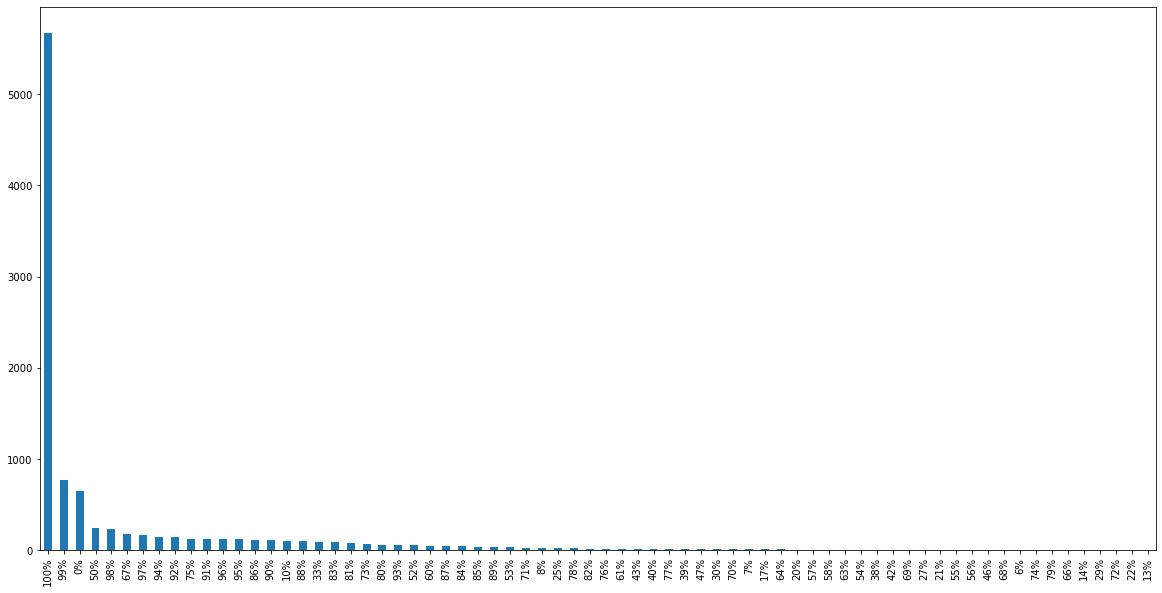

In [56]:
listings['host_acceptance_rate'].value_counts().plot.bar(figsize=(20,10))

**host_is_superhost**: three levels: f, t, nan(missing value). 15235 rows with f, 1837 rows with t and 2 rows with missing value.

In [96]:
listings['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [97]:
listings['host_is_superhost'].value_counts()

f    15235
t     1837
Name: host_is_superhost, dtype: int64

**host_thumbnail_url**: 7557 unique host's profile pictures on the listing page. Max length 106 characters.

In [101]:
listings['host_thumbnail_url'].nunique()

7557

In [102]:
max(listings['host_thumbnail_url'].str.len())

106.0

**host_picture_url**: 7557 unique host's profile pictures on the host page. Max length 109 characters.

In [103]:
listings['host_picture_url'].nunique()

7557

In [104]:
max(listings['host_picture_url'].str.len())

109.0

**host_neighbourhood**: <span style="color:blue">Need language detection.</span> 89 unique host neighbourhoods. Max length 28 characters.

In [108]:
listings['host_neighbourhood'].nunique()

89

In [110]:
host_neighbourhood = listings['host_neighbourhood'].dropna()
max(host_neighbourhood.str.len())

28

In [34]:
# language detection
host_neighbourhood = listings['host_neighbourhood']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(host_neighbourhood[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [35]:
set(langdet)

{'af',
 'cy',
 'da',
 'de',
 'en',
 'fi',
 'id',
 'it',
 'lt',
 'nl',
 'no',
 'pl',
 'pt',
 'sk',
 'so',
 'sv',
 'sw',
 'th',
 'tl',
 'vi'}

**host_listings_count**: from 0 listing to 422 listings. The median is 3 listings for a host. With few very large host's listing count, its distribution is highly skewed to the right.

In [120]:
listing_count = listings['host_listings_count']

In [121]:
max(listing_count)

422.0

In [122]:
min(listing_count)

0.0

In [123]:
listing_count.quantile([0.25,0.5,0.75])

0.25     1.0
0.50     3.0
0.75    11.0
Name: host_listings_count, dtype: float64

In [124]:
listing_count.describe()

count    17072.000000
mean        14.609770
std         36.417298
min          0.000000
25%          1.000000
50%          3.000000
75%         11.000000
max        422.000000
Name: host_listings_count, dtype: float64

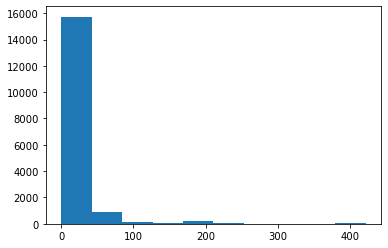

In [128]:
plt.hist(listing_count)
plt.show() 

**host_total_listings_count**: same as host_listings_count, <span style="color:blue">can ignore this attribute</span>

In [125]:
total_listing_count = listings['host_total_listings_count']

In [126]:
max(total_listing_count)

422.0

In [127]:
min(total_listing_count)

0.0

In [129]:
total_listing_count.quantile([0.25,0.5,0.75])

0.25     1.0
0.50     3.0
0.75    11.0
Name: host_total_listings_count, dtype: float64

In [130]:
total_listing_count.describe()

count    17072.000000
mean        14.609770
std         36.417298
min          0.000000
25%          1.000000
50%          3.000000
75%         11.000000
max        422.000000
Name: host_total_listings_count, dtype: float64

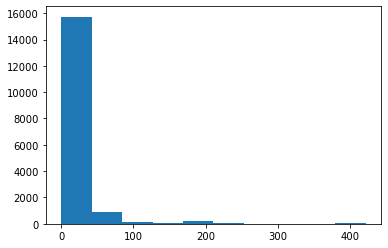

In [131]:
plt.hist(total_listing_count)
plt.show() 

In [132]:
count_diff = total_listing_count - listing_count

In [133]:
# two rows with missing values on listing_count and total_listing_count
len([i for i in range(len(count_diff)) if count_diff[i] != 0])

2

In [134]:
[i for i in range(len(count_diff)) if count_diff[i] != 0]

[7860, 12775]

In [138]:
(listing_count.iloc[7860], total_listing_count.iloc[7860])

(nan, nan)

In [139]:
(listing_count.iloc[12775], total_listing_count.iloc[12775])

(nan, nan)

**host_verifications**: there are three ways that a host can confirm identity: phone, email and work email. Hence there are 8 levels in total: 6 combinations of the three eays, no verification and no information on the verification. 12773 rows with verified email and phone; 2168 rows with verified email, phone and work email; 1916 rows with verified phone; 108 rows with verified phone and work email; 60 rows with no verification; 45 rows with verified email; 2 rows with verified work_email; 2 rows with no information on verification.

In [46]:
listings['host_verifications'].unique()

array(["['email', 'phone']", "['phone']",
       "['email', 'phone', 'work_email']", "['phone', 'work_email']",
       "['email']", '[]', "['work_email']", 'None'], dtype=object)

In [47]:
listings['host_verifications'].value_counts()

['email', 'phone']                  12773
['email', 'phone', 'work_email']     2168
['phone']                            1916
['phone', 'work_email']               108
[]                                     60
['email']                              45
['work_email']                          2
None                                    2
Name: host_verifications, dtype: int64

In [48]:
max(listings['host_verifications'].str.len())

32

<AxesSubplot:>

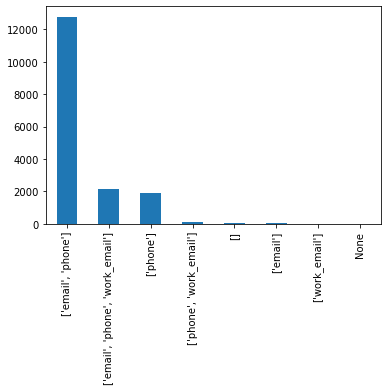

In [66]:
listings['host_verifications'].value_counts().plot.bar()

**host_has_profile_pic**: three levels: f, t, nan(missing value). 16922 rows with t, 150 rows with f and 2 rows with missing value.

In [140]:
listings['host_has_profile_pic'].unique()

array(['t', 'f', nan], dtype=object)

In [142]:
listings['host_has_profile_pic'].value_counts()

t    16922
f      150
Name: host_has_profile_pic, dtype: int64

**host_identity_verified**: three levels: f, t, nan(missing value). 16922 rows with t, 150 rows with f and 2 rows with missing value.

In [144]:
listings['host_identity_verified'].unique()

array(['f', 't', nan], dtype=object)

In [145]:
listings['host_identity_verified'].value_counts()

t    11550
f     5522
Name: host_identity_verified, dtype: int64

In [152]:
# this host only has id, url and 
listings[listings['host_identity_verified'].isna()].iloc[:, 8:26]

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
7860,21348778,https://www.airbnb.com/users/show/21348778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
12775,21348778,https://www.airbnb.com/users/show/21348778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [146]:
17074-11550-5522

2

**neighbourhood**: <span style="color:blue">Need language detection.</span> There are duplicate neighborhoods for the listings. Max length 84 characters.

In [52]:
listings['neighbourhood'].nunique()

729

In [51]:
max(listings['neighbourhood'].str.len())

84.0

In [36]:
# language detection
neighbourhood = listings['neighbourhood']
langdet = []                                                    

for i in range(len(reviews)):                                         
    try:                                                          
       lang = detect(neighbourhood[i])                                      
    except:                                                       
       lang = 'no'                                                                  
    langdet.append(lang) 

In [38]:
set(langdet)

{'en', 'fi', 'id', 'nl', 'no', 'sw', 'th', 'tl', 'vi'}

**neighbourhood_cleansed**: After cleaning the neighbourhood data with geological information, the neighbourhood size is now 50. The row counts for each neighbourhood are shown below. Max length 20 characters.

In [54]:
listings['neighbourhood_cleansed'].nunique()

50

In [57]:
listings['neighbourhood_cleansed'].unique()

array(['Bang Sue', 'Lak Si', 'Khlong Sam Wa', 'Thawi Watthana',
       'Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng', 'Don Mueang',
       'Parthum Wan', 'Rat Burana', 'Suanluang', 'Bang Rak', 'Yan na wa',
       'Vadhana', 'Khlong Toei', 'Saphan Sung', 'Sathon', 'Min Buri',
       'Khlong San', 'Bang Phlat', 'Phaya Thai', 'Chatu Chak', 'Sai Mai',
       'Lat Krabang', 'Bangkok Yai', 'Phasi Charoen', 'Phra Khanong',
       'Bang Kho laen', 'Huai Khwang', 'Wang Thong Lang', 'Nong Chok',
       'Phra Nakhon', 'Pra Wet', 'Dusit', 'Bueng Kum', 'Bang Khen',
       'Thon buri', 'Samphanthawong', 'Chom Thong', 'Khan Na Yao',
       'Lat Phrao', 'Bangkok Noi', 'Pom Prap Sattru Phai', 'Nong Khaem',
       'Bang Khae', 'Thung khru', 'Bang Khun thain', 'Taling Chan',
       'Bang Bon'], dtype=object)

In [58]:
listings['neighbourhood_cleansed'].value_counts()

Vadhana                 2117
Khlong Toei             2116
Huai Khwang             1180
Ratchathewi             1142
Bang Rak                 913
Sathon                   702
Bang Na                  690
Phra Nakhon              625
Phra Khanong             573
Chatu Chak               555
Din Daeng                474
Phaya Thai               472
Parthum Wan              447
Khlong San               400
Suanluang                367
Lak Si                   333
Bang Sue                 312
Bang Kapi                284
Pra Wet                  256
Don Mueang               241
Bang Phlat               236
Lat Krabang              223
Yan na wa                218
Thon buri                214
Phasi Charoen            162
Pom Prap Sattru Phai     159
Bang Kho laen            138
Samphanthawong           137
Bangkok Noi              133
Bang Khen                131
Wang Thong Lang          126
Bangkok Yai              104
Bang Khae                103
Dusit                    101
Min Buri      

In [56]:
max(listings['neighbourhood_cleansed'].str.len())

20

<AxesSubplot:>

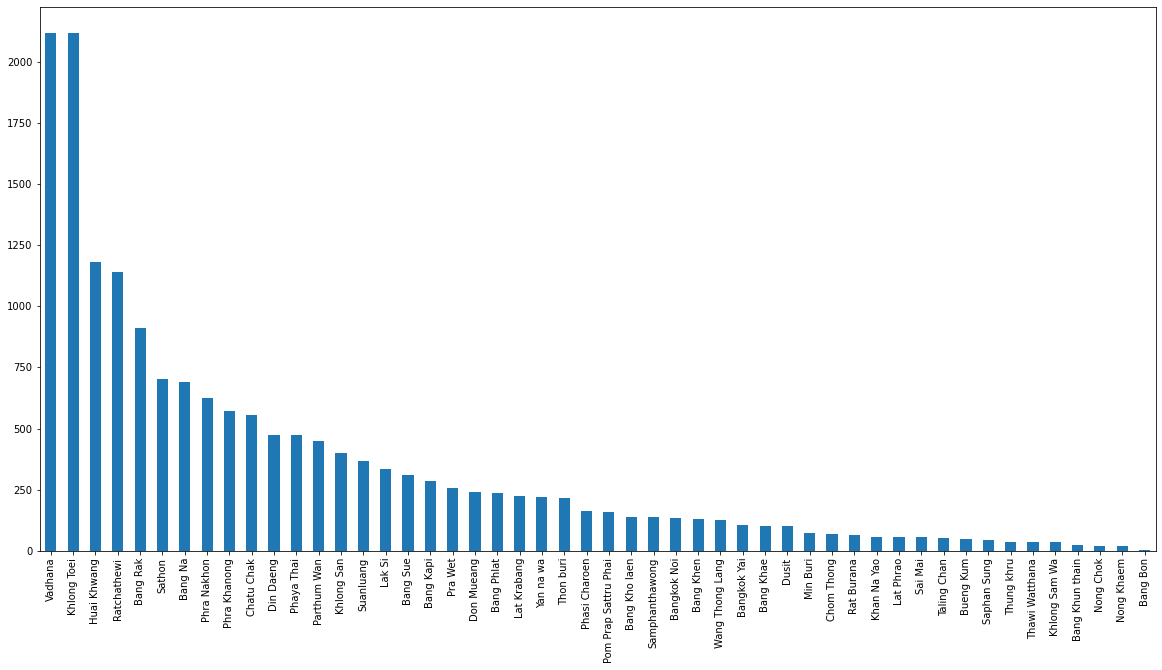

In [39]:
listings['neighbourhood_cleansed'].value_counts().plot.bar(figsize=(20,10))

**neighbourhood_group_cleansed**: all empty values, no data contained.

In [59]:
listings['neighbourhood_group_cleansed'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: neighbourhood_group_cleansed, dtype: float64

In [60]:
listings['neighbourhood_group_cleansed'].nunique()

0

**latitude**: ranges from 13.5273 to 13.97355. The distribution looks bell-shape, similar to normal distribution.

In [62]:
max(listings['latitude'])

13.97355

In [63]:
min(listings['latitude'])

13.5273

In [69]:
listings['latitude'].quantile([0.25,0.5,0.75])

0.25    13.719140
0.50    13.738555
0.75    13.763040
Name: latitude, dtype: float64

In [70]:
listings['latitude'].describe()

count    17074.000000
mean        13.746988
std          0.050114
min         13.527300
25%         13.719140
50%         13.738555
75%         13.763040
max         13.973550
Name: latitude, dtype: float64

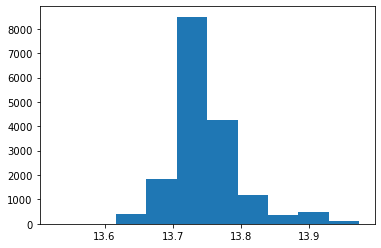

In [68]:
plt.hist(listings['latitude'])
plt.show() 

**longitude**: ranges from 100.31062 to 100.92344. The distribution is bell-shaped.

In [71]:
max(listings['longitude'])

100.92344

In [72]:
min(listings['longitude'])

100.31062

In [73]:
listings['longitude'].quantile([0.25,0.5,0.75])

0.25    100.52998
0.50    100.56162
0.75    100.58813
Name: longitude, dtype: float64

In [40]:
listings['longitude'].describe()

count    17074.000000
mean       100.561440
std          0.054145
min        100.310620
25%        100.529980
50%        100.561620
75%        100.588130
max        100.923440
Name: longitude, dtype: float64

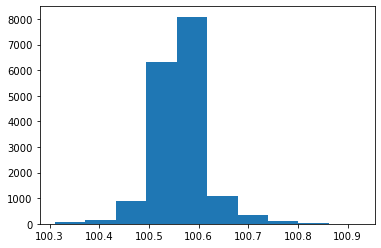

In [74]:
plt.hist(listings['longitude'])
plt.show() 

**property_type**: There are 86 types of property. The row counts for each property type are shown below. The most popular property type is entire rental unit, followed by entire condo. Max length 34 characters.

In [75]:
listings['property_type'].nunique()

86

In [76]:
listings['property_type'].unique()

array(['Entire condo', 'Private room in rental unit',
       'Private room in condo', 'Private room in home',
       'Entire rental unit', 'Private room in serviced apartment',
       'Room in hotel', 'Room in hostel', 'Private room in hostel',
       'Entire home', 'Entire serviced apartment',
       'Shared room in rental unit', 'Room in aparthotel',
       'Shared room in parking space', 'Private room in guesthouse',
       'Shared room in hostel', 'Entire loft', 'Private room in loft',
       'Shared room in guest suite', 'Shared room in condo',
       'Room in boutique hotel', 'Room in serviced apartment',
       'Private room in townhouse', 'Entire villa', 'Shared room in home',
       'Private room in cabin', 'Private room', 'Entire townhouse',
       'Room in bed and breakfast', 'Entire bed and breakfast',
       'Private room in bed and breakfast',
       'Shared room in bed and breakfast', 'Private room in floor',
       'Private room in island', 'Entire cottage',
       'Pri

In [43]:
listings['property_type'].value_counts()

Entire rental unit                    4048
Entire condo                          3651
Private room in rental unit           1775
Private room in condo                  972
Private room in home                   680
Room in boutique hotel                 662
Room in hotel                          609
Entire home                            451
Private room in hostel                 444
Private room in townhouse              432
Entire serviced apartment              412
Shared room in hostel                  346
Private room in serviced apartment     338
Private room in bed and breakfast      320
Entire townhouse                       292
Room in hostel                         229
Room in aparthotel                     170
Private room                           137
Room in serviced apartment             123
Private room in guesthouse              97
Room in bed and breakfast               78
Entire loft                             76
Shared room in bed and breakfast        68
Private roo

<AxesSubplot:>

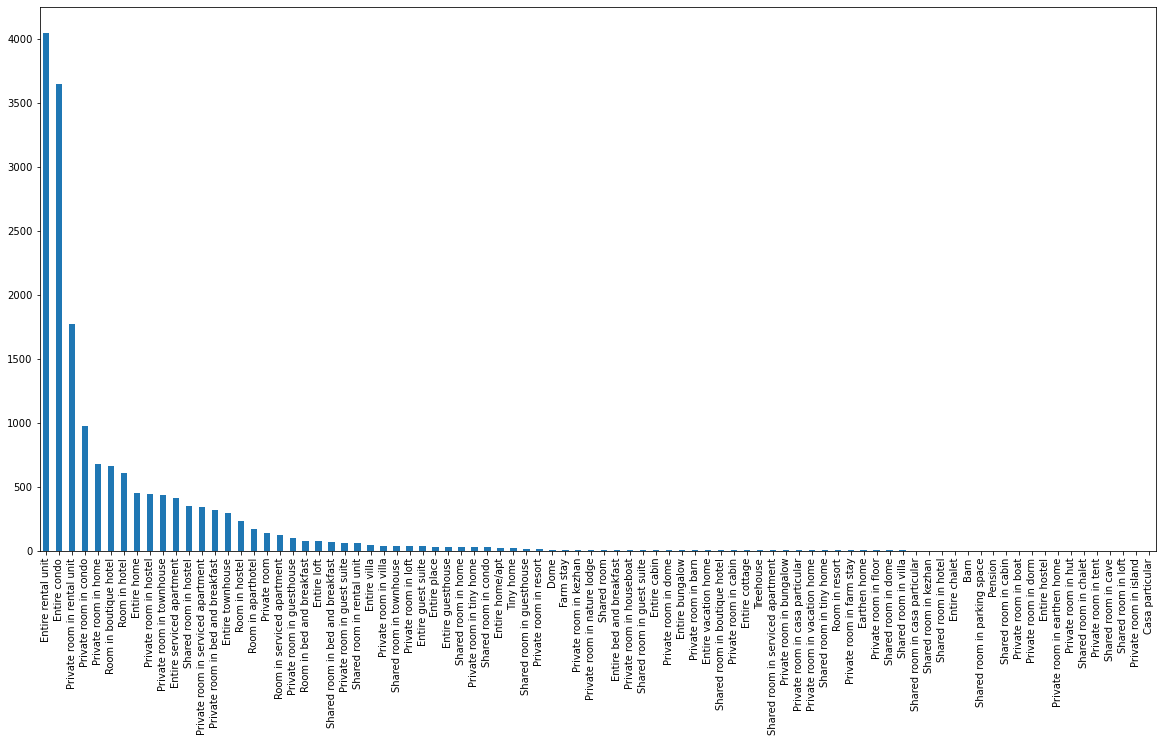

In [41]:
listings['property_type'].value_counts().plot.bar(figsize=(20,10))

In [79]:
max(listings['property_type'].str.len())

34

**room_type**: 4 room types: entire home/apt, private room, hotel room and shared room. There are 9224 rows with entire home/apt, 6445 rows with private room, 794 rows with hotel room and 611 rows with shared room.

In [80]:
listings['room_type'].nunique()

4

In [81]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [82]:
listings['room_type'].value_counts()

Entire home/apt    9224
Private room       6445
Hotel room          794
Shared room         611
Name: room_type, dtype: int64

<AxesSubplot:>

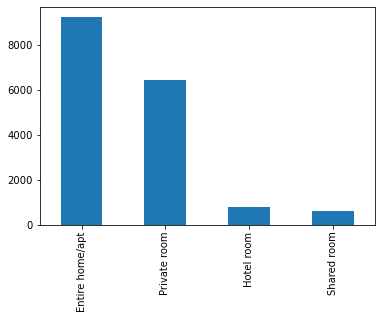

In [83]:
listings['room_type'].value_counts().plot.bar()

In [84]:
max(listings['room_type'].str.len())

15

**accommodates**: ranges from 0 to 16. Most of the listings can accommodate equal or less than 5 people, while few listings can host up to 16 guests. This leads to a right skewed distribution.

In [85]:
max(listings['accommodates'])

16

In [86]:
min(listings['accommodates'])

0

In [87]:
listings['accommodates'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    2.0
0.75    4.0
Name: accommodates, dtype: float64

In [88]:
listings['accommodates'].describe()

count    17074.000000
mean         3.063196
std          2.103913
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

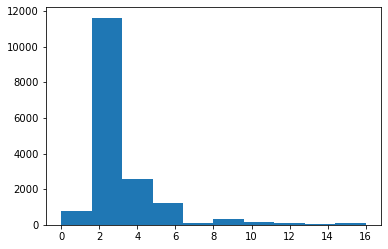

In [89]:
plt.hist(listings['accommodates'])
plt.show() 

**bathrooms**: empty column, no data contained.

In [95]:
listings['bathrooms'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: bathrooms, dtype: float64

In [96]:
listings['bathrooms'].unique()

array([nan])

**bathrooms_text**: 60 different descriptions of the bathrooms in the housing. The row count for each bathroom description is shown below. The most popular bathroom description is 1 bath, followed by 1 private bath. Max length 17 characters.

In [99]:
listings['bathrooms_text'].nunique()

60

In [98]:
listings['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '2 shared baths', '3 shared baths',
       '1.5 baths', '1 shared bath', '2.5 baths', '3.5 baths', '2 baths',
       nan, '4 baths', '6.5 shared baths', '3 baths', '0 baths',
       '1.5 shared baths', '0 shared baths', '6 baths', '8 shared baths',
       '2.5 shared baths', '6.5 baths', 'Half-bath', '10 shared baths',
       '6 shared baths', '4 shared baths', '4.5 baths', '5 baths',
       '8 baths', 'Shared half-bath', '5 shared baths',
       '4.5 shared baths', '7 baths', '5.5 baths', '3.5 shared baths',
       '20 shared baths', '8.5 baths', '7.5 baths', '5.5 shared baths',
       '7 shared baths', 'Private half-bath', '11 baths', '10.5 baths',
       '7.5 shared baths', '23 baths', '9 baths', '12 shared baths',
       '10 baths', '40 baths', '9 shared baths', '9.5 baths', '30 baths',
       '13 baths', '15 shared baths', '9.5 shared baths', '24 baths',
       '8.5 shared baths', '15 baths', '39 baths', '12.5 baths',
       '16 shared baths', '5

In [100]:
listings['bathrooms_text'].value_counts()

1 bath               7587
1 private bath       3743
2 baths              1472
1.5 baths            1236
1 shared bath         717
2 shared baths        281
3 baths               280
2.5 baths             212
4 baths               166
1.5 shared baths      139
3 shared baths        139
4 shared baths        114
5 shared baths        106
3.5 baths             100
8 shared baths         63
6 shared baths         50
5 baths                50
4.5 baths              49
0 shared baths         48
2.5 shared baths       43
0 baths                37
6 baths                34
Half-bath              34
4.5 shared baths       27
Shared half-bath       26
7 shared baths         18
5.5 shared baths       15
5.5 baths              15
8 baths                15
3.5 shared baths       14
Private half-bath      12
6.5 baths              12
10 shared baths        10
6.5 shared baths       10
7 baths                 7
8.5 baths               6
9 baths                 5
10 baths                5
16 shared ba

<AxesSubplot:>

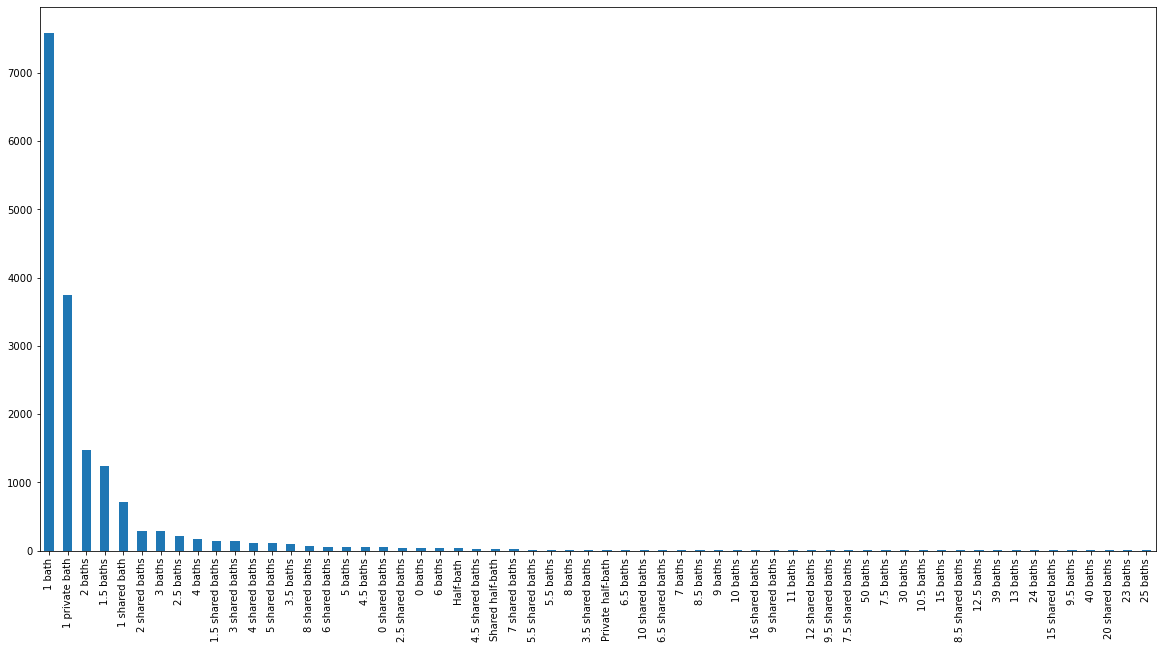

In [44]:
listings['bathrooms_text'].value_counts().plot.bar(figsize=(20,10))

In [101]:
max(listings['bathrooms_text'].str.len())

17.0

**bedrooms**: ranges from 1 to 50. Most of the listings have 1 bedroom, while few listings have up to 50 bedrooms. This leads to a very right skewed distribution.

In [102]:
max(listings['bedrooms'])

50.0

In [103]:
min(listings['bedrooms'])

1.0

In [104]:
listings['bedrooms'].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    1.0
0.75    1.0
Name: bedrooms, dtype: float64

In [105]:
listings['bedrooms'].describe()

count    15371.000000
mean         1.362566
std          1.244909
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         50.000000
Name: bedrooms, dtype: float64

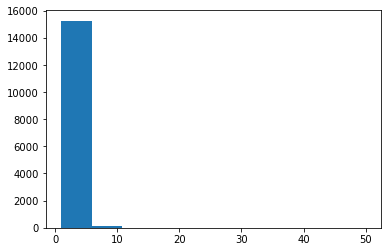

In [106]:
plt.hist(listings['bedrooms'])
plt.show() 

**beds**: ranges from 1 to 50. Most of the listings have 1 to 2 beds, while few listings have up to 50 beds. This leads to a very right skewed distribution.

In [107]:
max(listings['beds'])

50.0

In [108]:
min(listings['beds'])

1.0

In [109]:
listings['beds'].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    1.0
0.75    2.0
Name: beds, dtype: float64

In [110]:
listings['beds'].describe()

count    16557.000000
mean         1.837954
std          2.011477
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: beds, dtype: float64

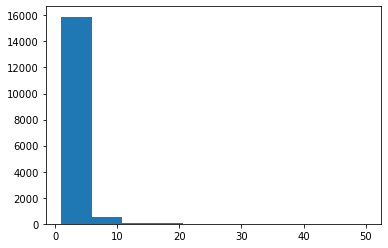

In [111]:
plt.hist(listings['beds'])
plt.show() 

**amenities**: 13880 unique description of amenities included. Max length 1606 characters.

In [112]:
listings['amenities'].nunique()

13880

In [113]:
max(listings['amenities'].str.len())

1606

In [54]:
amenities =  ' '.join(listings['amenities'])
amenities = amenities.replace("[", " ")
amenities = amenities.replace("]", " ")
amenities = amenities.split(",")
set(amenities)

{' "Fast wifi \\u2013 328 Mbps"   "Wifi"',
 ' "Hot water"   "Pack \\u2019n play/Travel crib"',
 ' "Fire extinguisher"   "Shared fenced garden or backyard"',
 ' "Toiletries"',
 ' "24\\" TV"',
 ' "Onsite restaurant \\u2014 Restaurant"',
 ' "Host greets you"',
 ' "Room-darkening shades"',
 ' "Fire extinguisher"   "Long term stays allowed"',
 ' "21\\" TV with standard cable"   "Kitchen"',
 ' "Shared outdoor olympic-sized rooftop pool"',
 ' "40\\" TV"',
 ' "Elevator"   "Wifi"',
 ' "Sharp refrigerator"',
 ' "Pool"   "Samsung refrigerator"',
 ' "Shared outdoor pool"',
 ' "42\\" HDTV with premium cable',
 ' "Gas stove"',
 ' "42\\" TV with Chromecast',
 ' "Washer \\u2013\\u00a0In unit"   "Wifi"',
 ' "40\\" HDTV with "',
 ' "Gym"   "Kitchen"',
 ' "Hot water"',
 ' "Game console: Nintendo Wii U"',
 ' "Mex - combination microwave & grill oven stainless steel oven"',
 ' "Free parking garage on premises \\u2013 3 spaces"',
 ' "Fast wifi \\u2013 547 Mbps"',
 ' "Children\\u2019s books and toys for ages

**price**: ranges from \\$0 to \\$1500000, not matching with the price in calendar. The distribtution of price is highly skewed to the right. 

In [114]:
price_listing = listings["price"].str.replace('[\$\,\.]', '').astype(float)
price_listing = price_listing/100
price_listing.head()

/var/folders/x7/bkzyc74x221_9zcr_p3637s40000gn/T/ipykernel_82601/881201311.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  price_listing = listings["price"].str.replace('[\$\,\.]', '').astype(float)


0     712.0
1    2500.0
2     600.0
3     650.0
4     500.0
Name: price, dtype: float64

In [118]:
max(price_listing)

1500000.0

In [119]:
min(price_listing)

0.0

In [120]:
price_listing.quantile([0.25,0.5,0.75])

0.25     790.0
0.50    1200.0
0.75    2000.0
Name: price, dtype: float64

In [121]:
price_listing.describe()

count    1.707400e+04
mean     2.262178e+03
std      1.332705e+04
min      0.000000e+00
25%      7.900000e+02
50%      1.200000e+03
75%      2.000000e+03
max      1.500000e+06
Name: price, dtype: float64

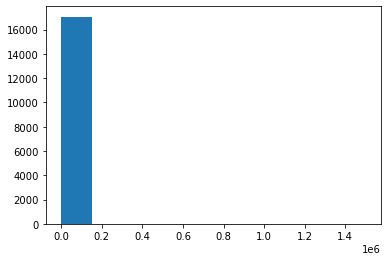

In [122]:
plt.hist(price_listing)
plt.show() 

**minimum_nights**: ranges from 1 to 1125 days. Most of the listings have a minimum equal or less than 7 days. Its distribution is highly skewed to the right.

In [124]:
max(listings['minimum_nights'])

1125

In [125]:
min(listings['minimum_nights'])

1

In [126]:
listings['minimum_nights'].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    1.0
0.75    7.0
Name: minimum_nights, dtype: float64

In [127]:
listings['minimum_nights'].describe()

count    17074.000000
mean        14.181797
std         46.362005
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: minimum_nights, dtype: float64

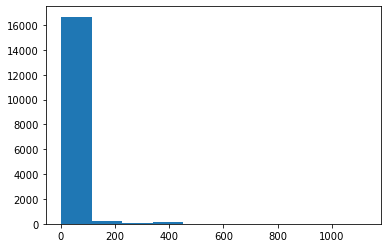

In [128]:
plt.hist(listings['minimum_nights'])
plt.show() 

**maximum_nights**: ranges from 1 to 100000 days. Most of the listings have a maximum equal or less than 1125 days. Its distribution is highly skewed to the right.

In [129]:
max(listings['maximum_nights'])

100000

In [130]:
min(listings['maximum_nights'])

1

In [131]:
listings['maximum_nights'].quantile([0.25,0.5,0.75])

0.25     365.0
0.50    1125.0
0.75    1125.0
Name: maximum_nights, dtype: float64

In [132]:
listings['maximum_nights'].describe()

count     17074.000000
mean        796.630432
std        1170.535489
min           1.000000
25%         365.000000
50%        1125.000000
75%        1125.000000
max      100000.000000
Name: maximum_nights, dtype: float64

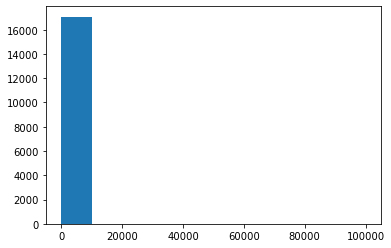

In [133]:
plt.hist(listings['maximum_nights'])
plt.show() 

**minimum_minimum_nights**: ranges from 1 to 1125 days. Most of the listings have a minimum equal or less than 7 days. Its distribution is highly skewed to the right. There are 16793 listings that have the same value of smallest minimum_nights value from the calender (looking 365 nights in the future) with their current minimum_nights.

In [137]:
same_min_nights = listings['minimum_minimum_nights'] == listings['minimum_nights']
sum(same_min_nights)

16793

In [140]:
listings[listings['minimum_minimum_nights'] != listings['minimum_nights']]['minimum_nights'].head()

170     5
223     7
327     3
454    30
500    30
Name: minimum_nights, dtype: int64

In [141]:
listings[listings['minimum_minimum_nights'] != listings['minimum_nights']]['minimum_minimum_nights'].head()

170     3.0
223     4.0
327     1.0
454    31.0
500    28.0
Name: minimum_minimum_nights, dtype: float64

In [142]:
max(listings['minimum_minimum_nights'])

1125.0

In [143]:
min(listings['minimum_minimum_nights'])

1.0

In [144]:
listings['minimum_minimum_nights'].describe()

count    17073.00000
mean        13.95244
std         45.54680
min          1.00000
25%          1.00000
50%          1.00000
75%          7.00000
max       1125.00000
Name: minimum_minimum_nights, dtype: float64

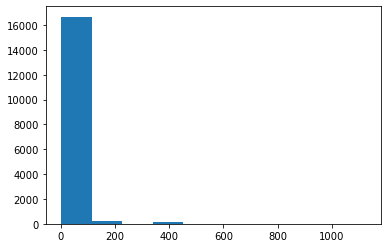

In [145]:
plt.hist(listings['minimum_minimum_nights'])
plt.show() 

**maximum_minimum_nights**: ranges from 1 to 1125 days. Most of the listings have a maximum equal or less than 1 days. Its distribution is highly skewed to the right. There are 16773 listings that have the same value of largest minimum_nights value from the calender (looking 365 nights in the future) with their current minimum_nights.

In [146]:
same_min_nights = listings['maximum_minimum_nights'] == listings['minimum_nights']
sum(same_min_nights)

16773

In [147]:
listings[listings['maximum_minimum_nights'] != listings['minimum_nights']]['minimum_nights'].head()

19    1
55    1
89    1
90    1
92    2
Name: minimum_nights, dtype: int64

In [148]:
listings[listings['maximum_minimum_nights'] != listings['minimum_nights']]['maximum_minimum_nights'].head()

19     2.0
55    10.0
89     5.0
90    10.0
92    28.0
Name: maximum_minimum_nights, dtype: float64

In [149]:
max(listings['maximum_minimum_nights'])

1125.0

In [150]:
min(listings['maximum_minimum_nights'])

1.0

In [151]:
listings['maximum_minimum_nights'].describe()

count    17073.000000
mean        14.208165
std         45.727986
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: maximum_minimum_nights, dtype: float64

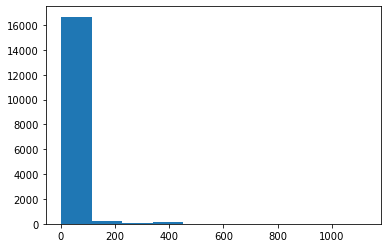

In [152]:
plt.hist(listings['maximum_minimum_nights'])
plt.show() 

**minimum_maximum_nights**: ranges from 1 to 2147483647 days. Most of the listings have a maximum equal or less than 1125 days. Its distribution is highly skewed to the right. There are 14801 listings that have the same value of smallest maximum_nights value from the calender (looking 365 nights in the future) with their current maximum_nights.

In [153]:
same_max_nights = listings['minimum_maximum_nights'] == listings['maximum_nights']
sum(same_max_nights)

14801

In [154]:
listings[listings['minimum_maximum_nights'] != listings['maximum_nights']]['maximum_nights'].head()

3      30
10     90
32    365
45    180
54    365
Name: maximum_nights, dtype: int64

In [155]:
listings[listings['minimum_maximum_nights'] != listings['maximum_nights']]['minimum_maximum_nights'].head()

3     1125.0
10    1125.0
32    1125.0
45    1125.0
54    1125.0
Name: minimum_maximum_nights, dtype: float64

In [156]:
max(listings['minimum_maximum_nights'])

2147483647.0

In [157]:
min(listings['minimum_maximum_nights'])

1.0

In [158]:
listings['minimum_maximum_nights'].describe()

count    1.707300e+04
mean     3.782240e+05
std      2.846492e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: minimum_maximum_nights, dtype: float64

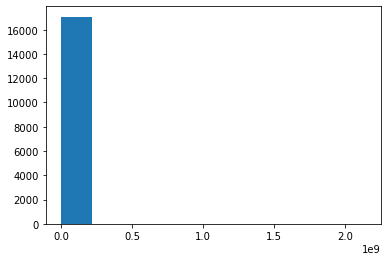

In [159]:
plt.hist(listings['minimum_maximum_nights'])
plt.show() 

**maximum_maximum_nights**: ranges from 1 to 2147483647 days. Most of the listings have a maximum equal or less than 1125 days. Its distribution is highly skewed to the right. There are 14961 listings that have the same value of largest maximum_nights value from the calender (looking 365 nights in the future) with their current maximum_nights. Combining the info from the previous column, it shows there are 14801 listings with no change in maximum nights for the future 365 days.

In [160]:
same_max_nights = listings['maximum_maximum_nights'] == listings['maximum_nights']
sum(same_max_nights)

14961

In [161]:
listings[listings['maximum_maximum_nights'] != listings['maximum_nights']]['maximum_nights'].head()

3      30
10     90
32    365
45    180
54    365
Name: maximum_nights, dtype: int64

In [162]:
listings[listings['maximum_maximum_nights'] != listings['maximum_nights']]['maximum_maximum_nights'].head()

3     1125.0
10    1125.0
32    1125.0
45    1125.0
54    1125.0
Name: maximum_maximum_nights, dtype: float64

In [165]:
max(listings['maximum_maximum_nights'])

2147483647.0

In [166]:
min(listings['maximum_maximum_nights'])

1.0

In [163]:
listings['maximum_maximum_nights'].describe()

count    1.707300e+04
mean     1.761841e+06
std      6.147144e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_maximum_nights, dtype: float64

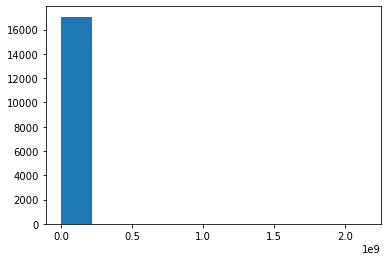

In [164]:
plt.hist(listings['maximum_maximum_nights'])
plt.show() 

**minimum_nights_avg_ntm**: ranges from 1 to 1125 days. Most of the listings have a minimum equal or less than 7 days. Its distribution is highly skewed to the right.

In [167]:
max(listings['minimum_nights_avg_ntm'])

1125.0

In [168]:
min(listings['minimum_nights_avg_ntm'])

1.0

In [170]:
listings['minimum_nights_avg_ntm'].describe()

count    17073.000000
mean        14.126035
std         45.591759
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: minimum_nights_avg_ntm, dtype: float64

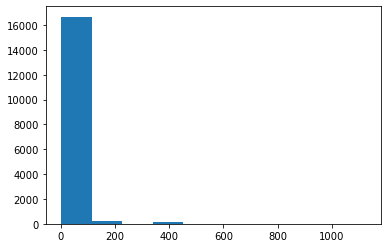

In [169]:
plt.hist(listings['minimum_nights_avg_ntm'])
plt.show() 

**maximum_nights_avg_ntm**: ranges from 1 to 2147483647 days. Most of the listings have a maximum equal or less than 1125 days. Its distribution is highly skewed to the right.

In [171]:
max(listings['maximum_nights_avg_ntm'])

2147483647.0

In [172]:
min(listings['maximum_nights_avg_ntm'])

1.0

In [173]:
listings['maximum_nights_avg_ntm'].describe()

count    1.707300e+04
mean     1.708050e+06
std      5.975215e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights_avg_ntm, dtype: float64

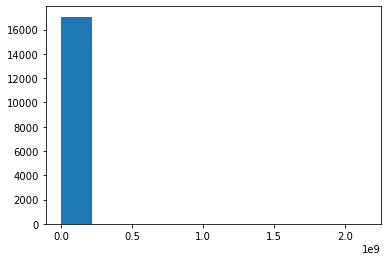

In [174]:
plt.hist(listings['maximum_nights_avg_ntm'])
plt.show() 

**calendar_updated**: emtpy column

In [176]:
listings['calendar_updated'].unique()

array([nan])

**has_availability**: two levels: t and f. There are 17004 listings with availability in the next 365 days based on calendar, and 70 listings not.

In [178]:
listings['has_availability'].unique()

array(['t', 'f'], dtype=object)

In [179]:
listings['has_availability'].value_counts()

t    17004
f       70
Name: has_availability, dtype: int64

**availability_30**: ranges from 0 to 30 days. Most of the listings have around 30 days of availability in the next 30 days.

In [180]:
max(listings['availability_30'])

30

In [181]:
min(listings['availability_30'])

0

In [182]:
listings['availability_30'].describe()

count    17074.000000
mean        21.449807
std         11.462251
min          0.000000
25%         13.000000
50%         29.000000
75%         30.000000
max         30.000000
Name: availability_30, dtype: float64

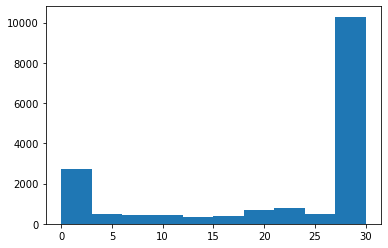

In [183]:
plt.hist(listings['availability_30'])
plt.show() 

**availability_60**: ranges from 0 to 60 days. Most of the distributions have around 60 days of availability in the next 60 days.

In [184]:
max(listings['availability_60'])

60

In [185]:
min(listings['availability_60'])

0

In [186]:
listings['availability_60'].describe()

count    17074.000000
mean        46.016575
std         20.917941
min          0.000000
25%         38.000000
50%         59.000000
75%         60.000000
max         60.000000
Name: availability_60, dtype: float64

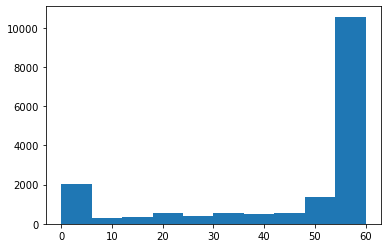

In [187]:
plt.hist(listings['availability_60'])
plt.show() 

**availability_90**: ranges from 0 to 90 days. Most of the distributions have around 90 days of availability in the next 90 days.

In [188]:
max(listings['availability_90'])

90

In [189]:
min(listings['availability_90'])

0

In [190]:
listings['availability_90'].describe()

count    17074.000000
mean        72.007731
std         29.163058
min          0.000000
25%         66.000000
50%         89.000000
75%         90.000000
max         90.000000
Name: availability_90, dtype: float64

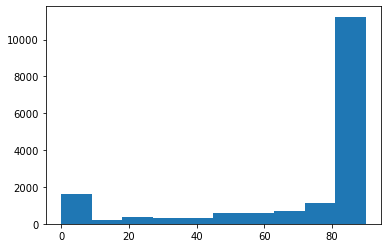

In [191]:
plt.hist(listings['availability_90'])
plt.show() 

**availability_365**: ranges from 0 to 365 days. Most of the distributions have around 365 days of availability in the next 365 days, with few around 0 days, 100 days and 150 days.

In [192]:
max(listings['availability_365'])

365

In [193]:
min(listings['availability_365'])

0

In [194]:
listings['availability_365'].describe()

count    17074.000000
mean       253.558451
std        123.933499
min          0.000000
25%        161.000000
50%        328.000000
75%        365.000000
max        365.000000
Name: availability_365, dtype: float64

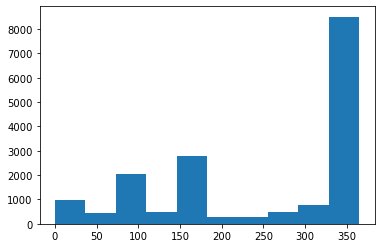

In [195]:
plt.hist(listings['availability_365'])
plt.show() 

**calendar_last_scraped**: there are two days that the airbnb data was scraped: 2022/06/20 and 2022/06/21.

In [197]:
listings['calendar_last_scraped'].unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

In [198]:
listings['calendar_last_scraped'].value_counts()

2022-06-21    14753
2022-06-20     2321
Name: calendar_last_scraped, dtype: int64

**number_of_reviews**: ranges from 0 to 1119 reviews. Most of the listings have less than 10 reviews, but few can up have to 1119 reviews. The distribution is highly skewed to the right.

In [199]:
max(listings['number_of_reviews'])

1119

In [200]:
min(listings['number_of_reviews'])

0

In [201]:
listings['number_of_reviews'].describe()

count    17074.000000
mean        14.445590
std         37.094589
min          0.000000
25%          0.000000
50%          1.000000
75%         10.000000
max       1119.000000
Name: number_of_reviews, dtype: float64

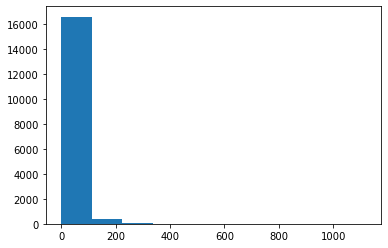

In [202]:
plt.hist(listings['number_of_reviews'])
plt.show() 

**number_of_reviews_ltm**: ranges from 0 to 112 reviews. Most of the listings have 0 reviews in the last 12 months, but few can up have to 112 reviews. The distribution is highly skewed to the right.

In [203]:
max(listings['number_of_reviews_ltm'])

112

In [204]:
min(listings['number_of_reviews_ltm'])

0

In [205]:
listings['number_of_reviews_ltm'].describe()

count    17074.000000
mean         1.187771
std          3.898571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        112.000000
Name: number_of_reviews_ltm, dtype: float64

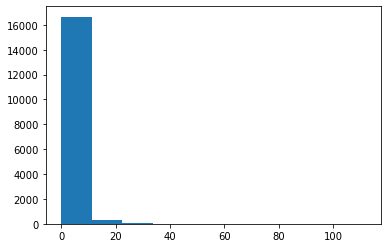

In [206]:
plt.hist(listings['number_of_reviews_ltm'])
plt.show() 

**number_of_reviews_l30d**: ranges from 0 to 23 reviews. Most of the listings have 0 reviews in the last 30 days, but few can up have to 23 reviews. The distribution is highly skewed to the right.

In [207]:
max(listings['number_of_reviews_l30d'])

23

In [208]:
min(listings['number_of_reviews_l30d'])

0

In [209]:
listings['number_of_reviews_l30d'].describe()

count    17074.000000
mean         0.199367
std          0.815325
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: number_of_reviews_l30d, dtype: float64

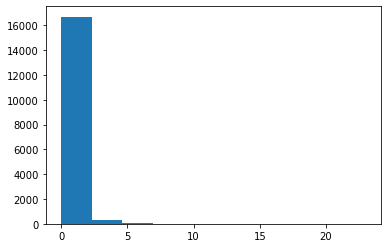

In [210]:
plt.hist(listings['number_of_reviews_l30d'])
plt.show() 

**first_review**: from 2011/02/09 to 2022/06/21.

In [214]:
# convert date to datetime object
first_review = pd.to_datetime(listings['first_review'].dropna())
first_review.head()

2    2019-11-15
3    2019-06-01
6    2012-04-07
9    2016-07-13
15   2014-02-03
Name: first_review, dtype: datetime64[ns]

In [218]:
first_review.shape

(10012,)

In [215]:
max(first_review)

Timestamp('2022-06-21 00:00:00')

In [216]:
min(first_review)

Timestamp('2011-02-09 00:00:00')

**last_review**: from 2012/12/15 to 2022/06/21. There are 1873 listings with same first review and last review date.

In [219]:
# convert date to datetime object
last_review = pd.to_datetime(listings['last_review'].dropna())
last_review.head()

2    2020-03-05
3    2019-12-07
6    2020-01-06
9    2022-04-01
15   2014-02-03
Name: last_review, dtype: datetime64[ns]

In [220]:
last_review.shape

(10012,)

In [221]:
max(last_review)

Timestamp('2022-06-21 00:00:00')

In [222]:
min(last_review)

Timestamp('2012-12-15 00:00:00')

In [223]:
same_review = last_review == first_review
sum(same_review)

1873

**review_scores_rating**: ranges from 0 to 5. Most reviews have 4 and above. The distribution is highly skewed to the left.

In [233]:
review_scores_rating = listings['review_scores_rating'].dropna()
review_scores_rating.shape

(10012,)

In [227]:
max(review_scores_rating)

5.0

In [228]:
min(review_scores_rating)

0.0

In [229]:
review_scores_rating.describe()

count    10012.000000
mean         4.541204
std          0.876216
min          0.000000
25%          4.500000
50%          4.800000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

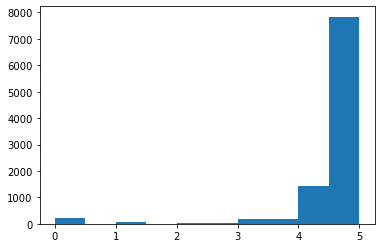

In [230]:
plt.hist(review_scores_rating)
plt.show() 

**review_scores_accuracy**: ranges from 0 to 5. Most reviews have 4 and above for accuracy. Only 9786 listings out of the 10012 listings that have review have review score for accuracy. The distribution is highly skewed to the left.

In [237]:
review_scores_accuracy = listings['review_scores_accuracy'].dropna()
review_scores_accuracy.shape

(9786,)

In [232]:
max(review_scores_accuracy)

5.0

In [234]:
min(review_scores_accuracy)

1.0

In [235]:
review_scores_accuracy.describe()

count    9786.000000
mean        4.709730
std         0.534413
min         1.000000
25%         4.670000
50%         4.880000
75%         5.000000
max         5.000000
Name: review_scores_accuracy, dtype: float64

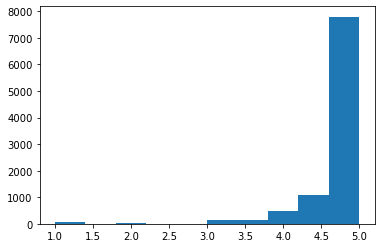

In [236]:
plt.hist(review_scores_accuracy)
plt.show() 

**review_scores_cleanliness**: ranges from 0 to 5. Most reviews have 4 and above for cleanliness. Only 9786 listings out of the 10012 listings that have review have review score for cleanliness. The distribution is highly skewed to the left.

In [238]:
review_scores_cleanliness = listings['review_scores_cleanliness'].dropna()
review_scores_cleanliness.shape

(9786,)

In [239]:
max(review_scores_cleanliness)

5.0

In [240]:
min(review_scores_cleanliness)

0.0

In [241]:
review_scores_cleanliness.describe()

count    9786.000000
mean        4.675581
std         0.530950
min         0.000000
25%         4.600000
50%         4.840000
75%         5.000000
max         5.000000
Name: review_scores_cleanliness, dtype: float64

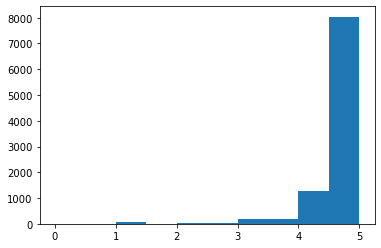

In [242]:
plt.hist(review_scores_cleanliness)
plt.show() 

**review_scores_checkin**: ranges from 0 to 5. Most reviews have 4 and above for checkin. Only 9780 listings out of the 10012 listings that have review have review score for checkin. The distribution is highly skewed to the left.

In [243]:
review_scores_checkin = listings['review_scores_checkin'].dropna()
review_scores_checkin.shape

(9780,)

In [244]:
max(review_scores_checkin)

5.0

In [245]:
max(review_scores_checkin)

5.0

In [246]:
review_scores_checkin.describe()

count    9780.000000
mean        4.753142
std         0.514311
min         0.000000
25%         4.730000
50%         4.920000
75%         5.000000
max         5.000000
Name: review_scores_checkin, dtype: float64

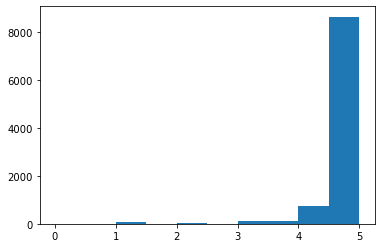

In [247]:
plt.hist(review_scores_checkin)
plt.show() 

**review_scores_communication**: ranges from 0 to 5. Most reviews have 4 and above for communication. Only 9785 listings out of the 10012 listings that have review have review score for communication. The distribution is highly skewed to the left.

In [248]:
review_scores_communication = listings['review_scores_communication'].dropna()
review_scores_communication.shape

(9785,)

In [249]:
max(review_scores_communication)

5.0

In [254]:
min(review_scores_communication)

0.0

In [251]:
review_scores_communication.describe()

count    9785.000000
mean        4.763751
std         0.507348
min         0.000000
25%         4.750000
50%         4.940000
75%         5.000000
max         5.000000
Name: review_scores_communication, dtype: float64

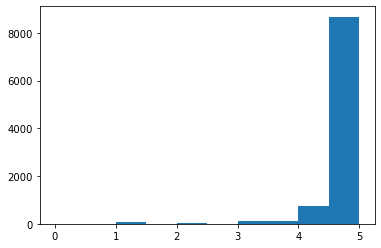

In [252]:
plt.hist(review_scores_communication)
plt.show() 

**review_scores_location**: ranges from 0 to 5. Most reviews have 4 and above for location. Only 9779 listings out of the 10012 listings that have review have review score for location. The distribution is highly skewed to the left.

In [253]:
review_scores_location = listings['review_scores_location'].dropna()
review_scores_location.shape

(9779,)

In [255]:
max(review_scores_location)

5.0

In [257]:
min(review_scores_location)

0.0

In [258]:
review_scores_location.describe()

count    9779.000000
mean        4.599265
std         0.538672
min         0.000000
25%         4.480000
50%         4.750000
75%         5.000000
max         5.000000
Name: review_scores_location, dtype: float64

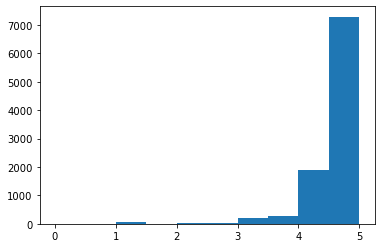

In [259]:
plt.hist(review_scores_location)
plt.show() 

**review_scores_value**: ranges from 0 to 5. Most reviews have 4 and above for value. Only 9778 listings out of the 10012 listings that have review have review score for value. The distribution is highly skewed to the left.

In [260]:
review_scores_value = listings['review_scores_value'].dropna()
review_scores_value.shape

(9778,)

In [261]:
max(review_scores_value)

5.0

In [262]:
min(review_scores_value)

0.0

In [263]:
review_scores_value.describe()

count    9778.000000
mean        4.640124
std         0.541973
min         0.000000
25%         4.550000
50%         4.780000
75%         5.000000
max         5.000000
Name: review_scores_value, dtype: float64

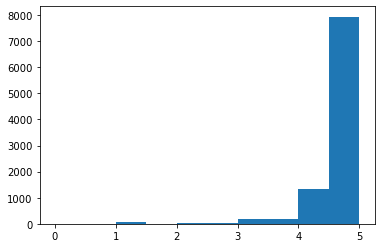

In [264]:
plt.hist(review_scores_value)
plt.show() 

**license**: empty column with no data

In [265]:
listings['license'].unique()

array([nan])

**instant_bookable**: two levels: t and f. 11376 listings are instant bookable while 5698 listings are not.

In [267]:
listings['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [268]:
listings['instant_bookable'].value_counts()

t    11376
f     5698
Name: instant_bookable, dtype: int64

**calculated_host_listings_count**: ranges from 1 to 195, different from host_listings_count. Most of the hosts have less or equal to 11 listings, but some have up to 195 listings. The distribution is highly skewed to the right.

In [269]:
max(listings['calculated_host_listings_count'])

195

In [270]:
min(listings['calculated_host_listings_count'])

1

In [271]:
listings['calculated_host_listings_count'].describe()

count    17074.000000
mean        11.953497
std         25.137223
min          1.000000
25%          1.000000
50%          4.000000
75%         11.000000
max        195.000000
Name: calculated_host_listings_count, dtype: float64

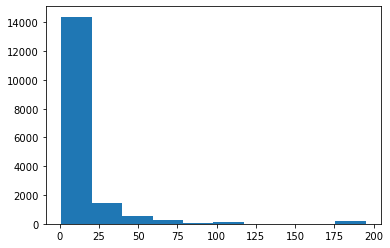

In [272]:
plt.hist(listings['calculated_host_listings_count'])
plt.show() 

**calculated_host_listings_count_entire_homes**: ranges from 0 to 195. Most of the hosts have less or equal to 5 listings of entire home/apt, but some have up to 195 listings. The distribution is highly skewed to the right.

In [273]:
max(listings['calculated_host_listings_count_entire_homes'])

195

In [274]:
min(listings['calculated_host_listings_count_entire_homes'])

0

In [275]:
listings['calculated_host_listings_count_entire_homes'].describe()

count    17074.000000
mean         8.130959
std         24.225898
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max        195.000000
Name: calculated_host_listings_count_entire_homes, dtype: float64

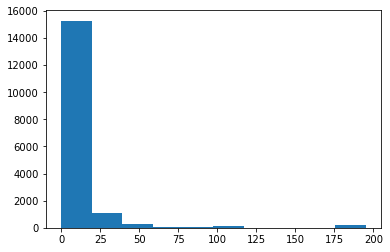

In [276]:
plt.hist(listings['calculated_host_listings_count_entire_homes'])
plt.show() 

**calculated_host_listings_count_private_rooms**: ranges from 0 to 195. Most of the hosts have less or equal to 2 listings of private rooms, but some have up to 56 listings. The distribution is highly skewed to the right.

In [277]:
max(listings['calculated_host_listings_count_private_rooms'])

56

In [278]:
min(listings['calculated_host_listings_count_private_rooms'])

0

In [279]:
listings['calculated_host_listings_count_private_rooms'].describe()

count    17074.000000
mean         2.632541
std          6.432300
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         56.000000
Name: calculated_host_listings_count_private_rooms, dtype: float64

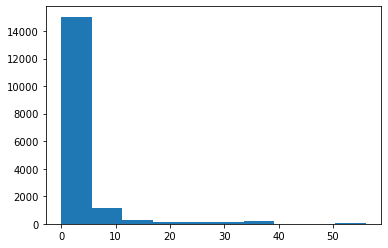

In [280]:
plt.hist(listings['calculated_host_listings_count_private_rooms'])
plt.show() 

**calculated_host_listings_count_shared_rooms**: ranges from 0 to 62. Most of the hosts have 0 listing of shared room, but some have up to 62 listings. The distribution is highly skewed to the right.

In [281]:
max(listings['calculated_host_listings_count_shared_rooms'])

62

In [282]:
min(listings['calculated_host_listings_count_shared_rooms'])

0

In [283]:
listings['calculated_host_listings_count_shared_rooms'].describe()

count    17074.000000
mean         0.490922
std          3.980412
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         62.000000
Name: calculated_host_listings_count_shared_rooms, dtype: float64

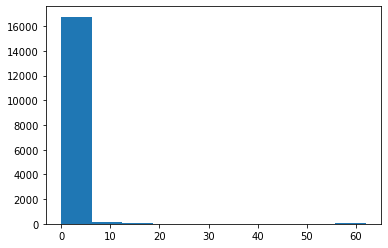

In [284]:
plt.hist(listings['calculated_host_listings_count_shared_rooms'])
plt.show() 

**reviews_per_month**: ranges from 0.01 to 19.42. Most of the hosts have less than 1 review per month. The distribution is highly skewed to the right.

In [286]:
reviews_per_month = listings['reviews_per_month'].dropna()
reviews_per_month.shape

(10012,)

In [287]:
max(reviews_per_month)

19.42

In [288]:
min(reviews_per_month)

0.01

In [289]:
reviews_per_month.describe()

count    10012.000000
mean         0.564038
std          0.812025
min          0.010000
25%          0.070000
50%          0.250000
75%          0.770000
max         19.420000
Name: reviews_per_month, dtype: float64

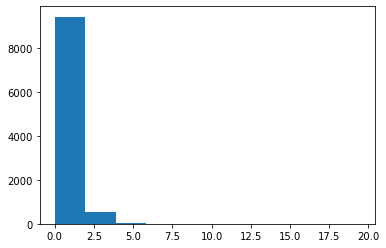

In [290]:
plt.hist(reviews_per_month)
plt.show() 

### 3.5 Attribute Constraint, PK and FK

* primary key(id)
* listing_url not null
* host_id not null (in future separation to host table, host_id is the primary key)
* host_url not null
* check (host_is_superhost in ('t', 'f'))
* check (host_listings_count >= 0)
* check (host_total_listings_count >= 0)
* check (host_has_profile_pic in ('t', 'f'))
* check (host_identity_verified in ('t', 'f'))
* check (latitude >= 0)
* check (longitude >= 0)
* check (room_type in ('Entire home/apt', 'Private room', 'Hotel room', 'Shared room'))
* check (accommodates >= 0)
* check (bedrooms >= 1)
* check (beds >= 1)
* check (price >= 0)
* check (minimum_nights >= 1)
* check (maximum_nights >= 1)
* check (minimum_minimum_nights >= 1)
* check (maximum_minimum_nights >= 1)
* check (minimum_maximum_nights >= 1)
* check (maximum_maximum_nights >= 1)
* check (minimum_nights_avg_ntm >= 1)
* check (maximum_nights_avg_ntm >= 1)
* check (has_availability in ('t', 'f'))
* check (availability_30 >= 0)
* check (availability_60 >= 0)
* check (availability_90 >= 0)
* check (availability_365 >= 0)
* check (number_of_reviews >= 0)
* check (number_of_reviews_ltm >= 0)
* check (number_of_reviews_l30d >= 0)
* check (review_scores_rating >= 0)
* check (review_scores_accuracy >= 0)
* check (review_scores_cleanliness >= 0)
* check (review_scores_checkin >= 0)
* check (review_scores_communication >= 0)
* check (review_scores_location >= 0)
* check (review_scores_value >= 0)
* check (instant_bookable in ('t', 'f'))
* check (calculated_host_listings_count >= 1)
* check (calculated_host_listings_count_entire_homes >= 0)
* check (calculated_host_listings_count_private_rooms >= 0)
* check (calculated_host_listings_count_shared_rooms >= 0)
* check (reviews_per_month >= 0)

any other?